<a href="https://colab.research.google.com/github/amrios80/data-analysis-airbnb/blob/master/airbnb/eda_amrios80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Parcial 1 (EDA)

MINE-4101: Applied Data Science  
Univerisdad de los Andes  
  
**Dataset:** : (1) la lista
de más de 900 celulares publicados a la fecha en la plataforma, (2) todo el detalle de cada
uno de los celulares de esta lista, y (3) la información básica de los diferentes vendedores.


**Business Context:** Mamá no es muy tecnológica por lo que no hay necesidad de regalarle un celular de gama
alta. Probablemente un celular de máximo $1.200.000 sea más que suficiente, aunque si
lo puedo pagar a cuotas mucho mejor 😅. Además de que las características del celular
como la marca, el color, el tamaño de la pantalla, entre otras, sean las ideales para ella,
siempre me gusta revisar que el vendedor tenga buena reputación (ojalá que sea una
tienda oficial), que ofrezca garantía de al menos 6 meses y que el envío sea gratis 😁. Su
cumpleaños es muy pronto así que lo mejor es que el vendedor esté en los alrededores
de Bogotá para que el envío sea rápido. Para propósitos del ejercicio, lo anterior no debe
considerarse como restricciones estrictas sino más bien como características o
condiciones de compra deseadas.

**Restricciones:**
-precio <= 1200000
-preferible a cuotas
-marca, color, tamano de pantalla ideal para mama.  
-vendedor con buena reputacion.
-preferible tienda oficial
-garantia >= 6 meses
-envio gratis.
-alrededores de bogota.


In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
# Pandas configuration for extending the number of columns and rows to show
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", 100)

# **1. Reporte de calidad y preparacion de los datos**

Preparar los datos y asegurar su calidad fue la parte mas compleja del ejercicio, el tamaño de los dataset y su formato .json dificultaron el cargue y su entendimiento.
Para solucionar lo anterior, se comprimieron los archivos mas pesados en formato .gz, se cargaron en un repositorio publico de github, desde collab se leyeron y se guardó cada uno en un dataset. El entendimiento por separado de cada dataset, permitió identificar las variables clave para el analisis asi como tambien los campos en comun para unificar la informacion, adicionalmente con las tecnicas para detectar de deteccion de datos nulos, se identificaron variables que no contaban con informacion y tampoco se podian imputar, razon por la cual se decidio eliminarlas como por ejemplo la variable:discounts en el dataset search_results y screen_size en el dataset items. En el entendimiento de los datasets se evidenciaron columnas a su vez en formato tipo .json cuya informacion fue extraida a traves funciones lambda diseñadas para cada uno de los campos, como por ejemplo los campos shipping y seller en el dataset search_result y el campo attributes del dataset de donde se extrajeron las caracteristicas de cada celular como: Brand, os, ram, color, screen_size, internal_memory, warranty_months, el mismo ejercicio de transformacion fue realizado para el dataset sellers con los campos: address y seller reputation de donde se extrajo la informacion de ubicacion geografica y calificacion del vendedor. Finalmente se consolidaron los tres datasets en 1 solo conteniendo las siguientes 19 columnas para el analisis:

1. item_id
2. price
3. installments_quantity
4. installments_amount
5. free_shipping
6. seller_id_x
7. sanitized_title
8. nickname
9. address_state
10. address_city
11. seller_reputation_level_id
12. official_store_id
13. condition
14. warranty_months
15. internal_memory
16. color
17. ram
18. brand
19. os



#                               Diagrama de Bloques

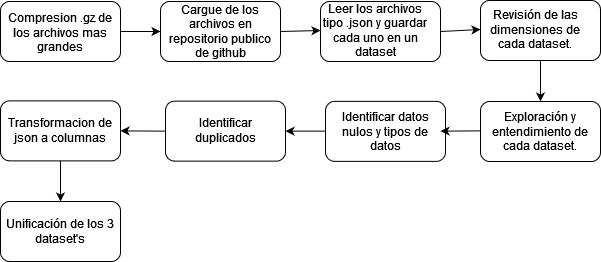

**1.1 Cargue de los datasets:** Se comprimen los dos mas grandes y se suben todos a un repositorio publico en github. Los archivos son .json, por lo cual se usa la funcion de pandas para la lectura de json.

In [3]:
items_url="https://github.com/amrios80/eda-jobs/raw/refs/heads/main/parcial1/items.json.gz"
search_url="https://github.com/amrios80/eda-jobs/raw/refs/heads/main/parcial1/search_results.json.gz"
sellers_url="https://github.com/amrios80/eda-jobs/raw/refs/heads/main/parcial1/sellers.json"

# Loading the datasets
items_df = pd.read_json(items_url, compression='gzip')
search_results_df=pd.read_json(search_url, compression="gzip")
sellers_df=pd.read_json(sellers_url)

 **1.2 Revision de dimensiones de los datasets.** Se observa que items y search contienen el mismo numero de filas por ende pueden tener una relacion 1 a 1, el dataset sellers tiene 212 filas por lo que puede tener una relacion aproximada de 1 a 4 con respecto a los otros dataset. Se determina que se deben unir los tres en un solo dataframe

In [4]:
print("dimensiones items:",items_df.shape)
print("dimensiones search results:",search_results_df.shape)
print("dimensiones sellers:",sellers_df.shape)

dimensiones items: (984, 45)
dimensiones search results: (984, 36)
dimensiones sellers: (212, 9)


 **1.3 Exploracion y Entendimiento de cada dataset**

**1.3.1 Exploracion dataset search_results (part1):** Se observa que el dataset contiene las caracteristicas detalladas de la publicacion de cada celular y le asocia un id para su identificacion. Las siguientes variables se identifican como importantes para el analisis:

*   id
*   sanitized_title
*   condition
*   site_id
*   price
*   available_quantity
*   order_backend
*   official_store_id
*   official_store_name
*   shipping
*   seller
*   promotions
*   discounts

Se observa que los campos shipping y seller son tipo .json y su informacion debe extraerse a columnas para el analisis.

In [5]:
#Explorando el dataset
search_results_df.sample(3)

,id,title,condition,thumbnail_id,catalog_product_id,listing_type_id,sanitized_title,permalink,buying_mode,site_id,category_id,domain_id,thumbnail,currency_id,order_backend,price,original_price,sale_price,available_quantity,official_store_id,use_thumbnail_id,accepts_mercadopago,shipping,stop_time,seller,attributes,installments,winner_item_id,catalog_listing,discounts,promotions,inventory_id,differential_pricing,official_store_name,variation_filters,variations_data
861,MCO1323889227,Zte Nubia Red Magic 8 Pro+ Transformers 5g Nx7...,new,784634-MCO70930144430_082023,MCO23314047,gold_special,,https://articulo.mercadolibre.com.co/MCO-13238...,buy_it_now,MCO,MCO1055,MCO-CELLPHONES,http://http2.mlstatic.com/D_784634-MCO70930144...,COP,25,8299000.0,NaN,"{'price_id': '', 'amount': 8299000, 'condition...",500,NaN,True,True,"{'store_pick_up': False, 'free_shipping': True...",2043-08-03 04:00:00+00:00,"{'id': 73243604, 'nickname': 'GREYBAQUEROLEZCA...","[{'id': 'BRAND', 'name': 'Marca', 'value_id': ...","{'quantity': 36, 'amount': 230528, 'rate': 0, ...",NaN,False,NaN,[],None,NaN,NaN,[COLOR],{'179363289179': {'thumbnail': 'http://http2.m...
534,MCO2431731566,Redmi 13c 4 Ram 256 Gb,new,851991-MCO76864974169_062024,MCO27962256,gold_special,redmi-13c-4-ram-256-gb,https://articulo.mercadolibre.com.co/MCO-24317...,buy_it_now,MCO,MCO1055,MCO-CELLPHONES,http://http2.mlstatic.com/D_851991-MCO76864974...,COP,41,500000.0,NaN,"{'price_id': '', 'amount': 500000, 'conditions...",1,NaN,True,True,"{'store_pick_up': False, 'free_shipping': True...",2044-06-01 04:00:00+00:00,"{'id': 22349656, 'nickname': 'NEXTECHNOLOGYBTA'}","[{'id': 'BRAND', 'name': 'Marca', 'value_id': ...","{'quantity': 36, 'amount': 13889, 'rate': 0, '...",NaN,False,NaN,[],None,NaN,NaN,[COLOR],{'180674413354': {'thumbnail': 'http://http2.m...
17,MCO1434183995,Honor Magic6 Lite Dual Sim 256 Gb Plateado 8 G...,new,865851-MLA78464727989_082024,MCO34239792,gold_special,honor-magic6-lite-dual-sim-256-gb-plateado-8-g...,https://www.mercadolibre.com.co/honor-magic6-l...,buy_it_now,MCO,MCO1055,MCO-CELLPHONES,http://http2.mlstatic.com/D_865851-MLA78464727...,COP,18,1164900.0,2016500.0,"{'price_id': '', 'amount': 1164900, 'condition...",1,NaN,True,True,"{'store_pick_up': False, 'free_shipping': True...",2044-05-31 04:00:00+00:00,"{'id': 162681369, 'nickname': 'CELUMOVIL STORE'}","[{'id': 'BRAND', 'name': 'Marca', 'value_id': ...","{'quantity': 36, 'amount': 32358, 'rate': 0, '...",NaN,True,NaN,[],ZXKF65140,NaN,NaN,NaN,NaN


In [6]:
#Se identifican los campos nulos y el tipo de datos para el dataset search_results
search_results_df[["id","sanitized_title","condition","site_id","price","available_quantity","order_backend","official_store_id","official_store_name","shipping","seller","promotions","discounts"]].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 984 entries, 0 to 983
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   984 non-null    object 
 1   sanitized_title      984 non-null    object 
 2   condition            984 non-null    object 
 3   site_id              984 non-null    object 
 4   price                984 non-null    float64
 5   available_quantity   984 non-null    int64  
 6   order_backend        984 non-null    int64  
 7   official_store_id    85 non-null     float64
 8   official_store_name  85 non-null     object 
 9   shipping             984 non-null    object 
 10  seller               984 non-null    object 
 11  promotions           984 non-null    object 
 12  discounts            0 non-null      float64
dtypes: float64(3), int64(2), object(8)
memory usage: 100.1+ KB


In [7]:
# detectando duplicados por id
duplicates_by_id = search_results_df.loc[search_results_df["id"].duplicated(keep=False)]

In [8]:
# el dataset search_results no tiene duplicados
duplicates_by_id.shape

(0, 36)

In [9]:
# Transforma los campos tipo .json a columnas
search_results_df["seller_id"]= search_results_df['seller'].apply(lambda x: x['id'])
search_results_df["free_shipping"]= search_results_df['shipping'].apply(lambda x: x['free_shipping'])
search_results_df["installments_quantity"]= search_results_df['installments'].apply(lambda x: x['quantity'])
search_results_df["installments_amount"]= search_results_df['installments'].apply(lambda x: x['amount'])

cols=["id","price","installments_quantity","installments_amount","free_shipping","seller_id","sanitized_title","attributes","available_quantity"]
part1_search=search_results_df[ cols ]
part1_search.columns=["item_id","price","installments_quantity","installments_amount","free_shipping","seller_id","sanitized_title","search_attributes","available_quantity"]




 **1.3.2 Exploracion dataset Items (parte3):** El dataset contiene las caracteristicas de los celulares, tambien contiene el campo id que es comun con el anterior dataset. Las caracteristicas del celular se encuentran en el campo attributes (tipo .json) y de alli se  extrae item_id, Brand, os, ram, color, screen_size, internal_memory, warranty_months

In [ ]:
#Se visualiza una muestra de tres registros del dataset items_df
items_df.sample(3)

,id,site_id,title,seller_id,category_id,official_store_id,price,base_price,original_price,currency_id,initial_quantity,sale_terms,buying_mode,listing_type_id,condition,permalink,thumbnail_id,thumbnail,pictures,video_id,descriptions,accepts_mercadopago,non_mercado_pago_payment_methods,shipping,international_delivery_mode,seller_address,seller_contact,location,coverage_areas,attributes,listing_source,variations,status,sub_status,tags,warranty,catalog_product_id,domain_id,parent_item_id,deal_ids,automatic_relist,date_created,last_updated,health,catalog_listing
393,MCO2460517578,MCO,Motorola Moto G54 5g 128 Gb Azul 8 Gb Ram,205036097,MCO1055,NaN,549900,549900,NaN,COP,11,"[{'id': 'WARRANTY_TYPE', 'name': 'Tipo de gara...",buy_it_now,gold_special,new,https://articulo.mercadolibre.com.co/MCO-24605...,865243-MCO77123850723_062024,http://http2.mlstatic.com/D_865243-MCO77123850...,"[{'id': '865243-MCO77123850723_062024', 'url':...",NaN,[],True,[],"{'mode': 'me2', 'methods': [], 'tags': ['manda...",none,"{'city': {'id': 'TUNPQ0JBUjkzOTg0', 'name': 'B...",NaN,{},[],"[{'id': 'ACCESSORIES_INCLUDED', 'name': 'Acces...",,"[{'id': 180767851476, 'price': 549900, 'attrib...",active,[],"[good_quality_thumbnail, standard_price_by_cha...",Garantía de fábrica: 9 meses,None,MCO-CELLPHONES,None,[],False,2024-06-19T21:26:04.724Z,2024-08-16T15:41:02.305Z,0.8,False
774,MCO2412044862,MCO,Celular Motorola G24 256gb / 8ram / 50mpx,224855110,MCO1055,NaN,489900,489900,NaN,COP,11,"[{'id': 'WARRANTY_TYPE', 'name': 'Tipo de gara...",buy_it_now,gold_special,new,https://articulo.mercadolibre.com.co/MCO-24120...,680513-MCO76515063052_052024,http://http2.mlstatic.com/D_680513-MCO76515063...,"[{'id': '871400-MCO76514973830_052024', 'url':...",NaN,[],True,[],"{'mode': 'me2', 'methods': [], 'tags': ['self_...",none,"{'city': {'id': 'TUNPQ01BUjU5NzU1', 'name': 'M...",NaN,{},[],"[{'id': 'ACCESSORIES_INCLUDED', 'name': 'Acces...",,"[{'id': 182953175635, 'price': 489900, 'attrib...",active,[],"[good_quality_thumbnail, immediate_payment, ca...",Garantía de fábrica: 12 meses,None,MCO-CELLPHONES,None,[],False,2024-05-29T18:36:54.163Z,2024-09-25T02:11:26.408Z,0.9,False
549,MCO2589527898,MCO,Celular Infinix Hot 40i Dual Sim 256gb Dorado ...,291001852,MCO1055,NaN,484900,484900,NaN,COP,10,"[{'id': 'WARRANTY_TYPE', 'name': 'Tipo de gara...",buy_it_now,gold_special,new,https://articulo.mercadolibre.com.co/MCO-25895...,894612-MLU75146948712_032024,http://http2.mlstatic.com/D_894612-MLU75146948...,"[{'id': '894612-MLU75146948712_032024', 'url':...",NaN,[],True,[],"{'mode': 'me2', 'methods': [], 'tags': ['self_...",none,"{'city': {'id': 'TUNPQ01FRGRjNjc4', 'name': 'M...",NaN,{},[],"[{'id': 'BATTERY_CAPACITY', 'name': 'Capacidad...",,[],active,[],"[good_quality_thumbnail, immediate_payment, ca...",Garantía de fábrica: 12 meses,MCO34730613,MCO-CELLPHONES,None,[],False,2024-08-01T16:41:44.045Z,2024-09-24T23:12:21.937Z,NaN,True


In [ ]:
#Se identifican los campos nulos y el tipo de datos para el dataset items_df
items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 984 entries, 0 to 983
Data columns (total 45 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                984 non-null    object 
 1   site_id                           984 non-null    object 
 2   title                             984 non-null    object 
 3   seller_id                         984 non-null    int64  
 4   category_id                       984 non-null    object 
 5   official_store_id                 85 non-null     float64
 6   price                             984 non-null    int64  
 7   base_price                        984 non-null    int64  
 8   original_price                    7 non-null      float64
 9   currency_id                       984 non-null    object 
 10  initial_quantity                  984 non-null    int64  
 11  sale_terms                        984 non-null    object 
 12  buying_m

In [10]:
# detectando duplicados por id
duplicates_by_id_items = items_df.loc[items_df["id"].duplicated(keep=False)]

In [ ]:
# el dataset items no tiene duplicados
duplicates_by_id_items.shape

(0, 45)

In [51]:
# Transformacion de json a columnas

import re #libreria para expresiones regulares
cols=["id","seller_id","official_store_id","price","warranty","seller_address","condition", "shipping","sale_terms","attributes"] # Seleccion de campos clave
part3_items=items_df[cols]
part3_items.columns=["item_id","seller_id","official_store_id","item_price","warranty","seller_address","condition", "shipping","sale_terms","item_attributes"] # cambio nombres de columnas

#Lambdas para extraer data del campo json atributos
def  find_brand( tokens ):
  for i in tokens:
    if i["id"]=="BRAND":
      return i["value_name"]
  return None

def find_internal_memory(tokens):
  for i in tokens:
    if i["id"]=="INTERNAL_MEMORY":
      return i["value_name"]
  return None

def find_screen_size(tokens):
  for i in tokens:
    if i["id"]=="SCREEN_SIZE":
      return i["value_name"]
  return None

def find_color(tokens):
  for i in tokens:
    if i["id"]=="COLOR":
      return i["value_name"]
  return None

def find_ram(tokens):
  for i in tokens:
    if i["id"]=="RAM":
      return i["value_name"]
  return None

def find_os(tokens):
  for i in tokens:
    if i["id"]=='OPERATING_SYSTEM_NAME':
      return i["value_name"]
  return None

#extraccion del numero de meses de garantia
def extract_months(data_line):
    # Regular expression to capture the number and the unit (años, meses, días)
    match = re.search(r'(\d+)\s*(años|meses|días)', str(data_line))
    if match:
        number = int(match.group(1))
        unit = match.group(2)
        # Convert the warranty period to months
        if unit == 'años':
            return number * 12
        elif unit == 'meses':
            return number
        elif unit == 'días':
            return round(number / 30)  # Approximate conversion of days to months
    return None

part3_items["warranty_months"]= part3_items['warranty'].apply(lambda x: extract_months(x) )
part3_items["internal_memory"]= part3_items['item_attributes'].apply(lambda x: find_internal_memory(x) )
part3_items["screen_size"]= part3_items['item_attributes'].apply(lambda x: find_screen_size(x) )
part3_items["color"]= part3_items['item_attributes'].apply(lambda x: find_color(x) )
part3_items["ram"]= part3_items['item_attributes'].apply(lambda x: find_ram(x) )
part3_items["brand"]= part3_items['item_attributes'].apply( lambda x: find_brand(x) )
part3_items["os"]= part3_items['item_attributes'].apply( lambda x: find_os(x) )

part3_items["DISPLAY_RESOLUTION"]=part3_items['item_attributes'].apply( lambda x: next((i["value_name"] for i in x if i["id"]=="DISPLAY_RESOLUTION"), None))
part3_items["HEIGHT"]=part3_items['item_attributes'].apply( lambda x: next((i["value_name"] for i in x if i["id"]=="HEIGHT"), None))
part3_items["WIDTH"]=part3_items['item_attributes'].apply( lambda x: next((i["value_name"] for i in x if i["id"]=="WIDTH"), None))
part3_items["WEIGHT"]=part3_items['item_attributes'].apply( lambda x: next((i["value_name"] for i in x if i["id"]=="WEIGHT"), None))
part3_items.loc[:, "ITEM_CONDITION"]=part3_items['item_attributes'].apply( lambda x: next((i["value_name"] for i in x if i["id"]=="ITEM_CONDITION"),None))


<ipython-input-51-5bcdfbec44ef>:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  part3_items["warranty_months"]= part3_items['warranty'].apply(lambda x: extract_months(x) )
<ipython-input-51-5bcdfbec44ef>:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  part3_items["internal_memory"]= part3_items['item_attributes'].apply(lambda x: find_internal_memory(x) )
<ipython-input-51-5bcdfbec44ef>:63: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_inde

In [14]:
part3_items.sample(3)

,item_id,seller_id,official_store_id,item_price,warranty,seller_address,condition,shipping,sale_terms,item_attributes,warranty_months,internal_memory,screen_size,color,ram,brand,os,DISPLAY_RESOLUTION,HEIGHT,WIDTH,WEIGHT,ITEM_CONDITION
291,MCO1455436109,207591665,NaN,344000,Garantía de fábrica: 12 meses,"{'city': {'id': 'TUNPQ01FRGRjNjc4', 'name': 'M...",new,"{'mode': 'me2', 'methods': [], 'tags': ['self_...","[{'id': 'WARRANTY_TYPE', 'name': 'Tipo de gara...","[{'id': 'BATTERY_CAPACITY', 'name': 'Capacidad...",12.0,64 GB,None,Negro,4 GB,Samsung,Android,720 px x 1600 px,164.4 mm,76.3 mm,192 g,Nuevo
92,MCO1452039561,1884597321,NaN,234647,Sin garantía,"{'city': {'id': 'Q04tSE5IZW5neWFuZw', 'name': ...",new,"{'mode': 'me2', 'methods': [], 'tags': ['manda...","[{'id': 'WARRANTY_TYPE', 'name': 'Tipo de gara...","[{'id': 'BRAND', 'name': 'Marca', 'value_id': ...",NaN,None,None,None,None,Generic,None,None,None,None,None,Nuevo
387,MCO2523562828,476229825,NaN,4899920,Garantía del vendedor: 3 meses,"{'city': {'id': 'TUNPQ0NIQTk2OTI1', 'name': 'C...",new,"{'mode': 'me2', 'methods': [], 'tags': ['self_...","[{'id': 'WARRANTY_TYPE', 'name': 'Tipo de gara...","[{'id': 'BATTERY_CAPACITY', 'name': 'Capacidad...",3.0,512 GB,None,Negro,12 GB,Samsung,Android,1440 px x 3088 px,163.4 mm,78.1 mm,233 g,Nuevo


In [16]:
part3_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 984 entries, 0 to 983
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   item_id             984 non-null    object 
 1   seller_id           984 non-null    int64  
 2   official_store_id   85 non-null     float64
 3   item_price          984 non-null    int64  
 4   warranty            979 non-null    object 
 5   seller_address      984 non-null    object 
 6   condition           984 non-null    object 
 7   shipping            984 non-null    object 
 8   sale_terms          984 non-null    object 
 9   item_attributes     984 non-null    object 
 10  warranty_months     936 non-null    float64
 11  internal_memory     964 non-null    object 
 12  screen_size         0 non-null      object 
 13  color               409 non-null    object 
 14  ram                 962 non-null    object 
 15  brand               984 non-null    object 
 16  os      

**1.3.3 Exploracion dataset Sellers (part2):** Se observa que el dataset contiene la informacion del vendedor con el id como identificador, este id es diferente al campo con el mismo nombre de los dataset's search_results e items, para asociarlo a los demas dataset's se debe cruzar con el campo seller_id del dataset items. Se debe extraer la informacion de ubicacion y calificacion del cliente de los campos address y seller reputation que estan en formato .json

In [ ]:
sellers_df.head(3)

,id,nickname,country_id,address,user_type,site_id,permalink,seller_reputation,status
0,1305122305,SASNEXTMOVIL20230207170924,CO,"{'city': 'Usaquén', 'state': 'CO-DC'}",normal,MCO,http://perfil.mercadolibre.com.co/SASNEXTMOVIL...,"{'level_id': '5_green', 'power_seller_status':...",{'site_status': 'active'}
1,819549189,LUISALEJANDROPASCAGAZAPINZN,CO,"{'city': 'Suba', 'state': 'CO-DC'}",normal,MCO,http://perfil.mercadolibre.com.co/LUISALEJANDR...,"{'level_id': '5_green', 'power_seller_status':...",{'site_status': 'active'}
2,582439941,UDM SHOP,CO,"{'city': 'Medellín', 'state': 'CO-ANT'}",normal,MCO,http://perfil.mercadolibre.com.co/UDM+SHOP,"{'level_id': '5_green', 'power_seller_status':...",{'site_status': 'active'}


In [17]:
# Se aplica funcion lambda para extraer la ubicacion geografica del vendedor y la puntuacion de la reputacion
sellers_df["address_state"]= sellers_df['address'].apply(lambda x: x['state'])
sellers_df["address_city"]= sellers_df['address'].apply(lambda x: x['city'])
sellers_df["seller_reputation_level_id"]= sellers_df['seller_reputation'].apply(lambda x: x['level_id'])

cols=["id","nickname","address_state","address_city","seller_reputation_level_id"]
part2_sellers=sellers_df[cols]
part2_sellers.columns=["seller_id","nickname","address_state","address_city","seller_reputation_level_id"]

In [ ]:
part2_sellers.sample(5)

,seller_id,nickname,address_state,address_city,seller_reputation_level_id
142,1190588231,JEANCANIELI-COR,HK-HK,Central & Western,5_green
3,738767370,EASYBUYSHOPCOMCO,CO-RIS,Pereira,5_green
42,556471382,TG PRODUCTOS,CO-DC,Martires,5_green
122,1724461334,CNXIAMENSUXINDIANZISHANCOR,CN-JX,Shangrao,5_green
136,219702071,JUANBY_ALFONSO,CO-DC,Teusaquillo,3_yellow


 **1.4 Union de los datasets en el dataset total**

In [46]:
# Union del dataset search_results con seller por el campo seller_id
total=part1_search.merge(part2_sellers, on="seller_id", how="left")
total=total.merge(part3_items, on="item_id", how="left")
total.drop(columns=["seller_id_y"], inplace=True)

In [52]:
#Conversiones de otras variables: ram
def convert_to_mb(size_str):
    # Split the number and unit from the input string
    if pd.isna(size_str):
        return np.nan
    if isinstance(size_str, float):
        return size_str
    size, unit = size_str.split()
    size = float(size)  # Convert the numeric part to a float

    # Convert based on the unit
    if unit.lower() == "kb":
        return size / 1024  # Convert KB to MB
    elif unit.lower() == "mb":
        return size  # Already in MB
    elif unit.lower() == "g" or unit.lower() == "gb":
        return size * 1024  # Convert GB to MB
    elif unit.lower() == "tb":
        return size * 1024 * 1024  # Convert TB to MB
    else:
        raise ValueError(f"Unknown unit: {unit}")

def convert_memory_to_mb(memory_str):
    # Split the number and unit from the input string
    if pd.isna(memory_str):
        return np.nan
    if isinstance(memory_str, float):
        return memory_str
    else:
        return np.nan



# Define the mapping from string to number
reputation_mapping = {
    "3_yellow": 3,
    "4_light_green": 4,
    "5_green": 5
}

# Apply the mapping to convert the string values to numbers
total['seller_reputation'] = total['seller_reputation_level_id'].map(reputation_mapping)

total["internal_memory_mb"] = total["internal_memory"].apply(convert_to_mb)
total["ram_mb"]= total["ram"].apply(convert_to_mb)

total["has_official_store"]=total["official_store_id"].apply(lambda x: 0 if pd.isna(x) else 1)
total["has_warranty"]=total["warranty_months"].apply(lambda x: 0 if pd.isna(x) else 1)

In [48]:
total.shape
#984,17)

(984, 38)

In [56]:
# Se borran las columnas que no son necesarias
total.drop(columns=["search_attributes","item_price","warranty","seller_address","shipping","sale_terms","item_attributes","screen_size"], inplace=True , axis=1, errors='ignore')

In [57]:
total.sample(3)

,item_id,price,installments_quantity,installments_amount,free_shipping,seller_id_x,sanitized_title,available_quantity,nickname,address_state,address_city,seller_reputation_level_id,official_store_id,condition,warranty_months,internal_memory,color,ram,brand,os,DISPLAY_RESOLUTION,HEIGHT,WIDTH,WEIGHT,ITEM_CONDITION,seller_reputation,internal_memory_mb,ram_mb,has_official_store,has_warranty
844,MCO462898407,2529000.0,36,70250.0,True,73243604,huawei-p20-pro-clt-l29-6gb-128gb-dual-sim-duos,500,GREYBAQUEROLEZCANO,CO-DC,Kennedy,5_green,NaN,new,1.0,128 GB,None,6 GB,Huawei,None,1080 px x 2240 px,None,None,0.18 kg,Nuevo,5.0,131072.0,6144.0,0,1
719,MCO1378913187,359900.0,36,9997.0,True,1042129587,,1,BLACKBOX_TIENDA_VIRTUAL,CO-DC,Martires,5_green,NaN,new,6.0,64 GB,None,4 GB,HTC,Android,720 px x 1440 px,147.86 mm,71.4 mm,160 g,Nuevo,5.0,65536.0,4096.0,0,1
295,MCO1480378625,477900.0,36,13275.0,True,291001852,xiaomi-poco-poco-c65-dual-sim-128-gb-violeta-6...,1,TECNOSUPER.,CO-ANT,Medellín,5_green,NaN,new,12.0,128 GB,Violeta,6 GB,Xiaomi,Android,1600 px x 720 px,16.8 cm,7.8 cm,192 g,Nuevo,5.0,131072.0,6144.0,0,1


# **2. Analisis exploratorio de las variables mas relevantes**




### **2.1 Analisis Univariado**







**Atributo 1 Precio (Price) - Analisis medidas de tendencia central y distribucion:** Se observa que la variable precio tiene una desviacion estandar amplia, lo que puede significar que hayan valores muy altos o muy bajos para el precio o que haya una alta variabilidad del precio. Lo anterior se confirma observando el percentil 95, donde se evidencia que el 5% de los listings puede llegar a tener un precio que varia mayor a 4.7 millones

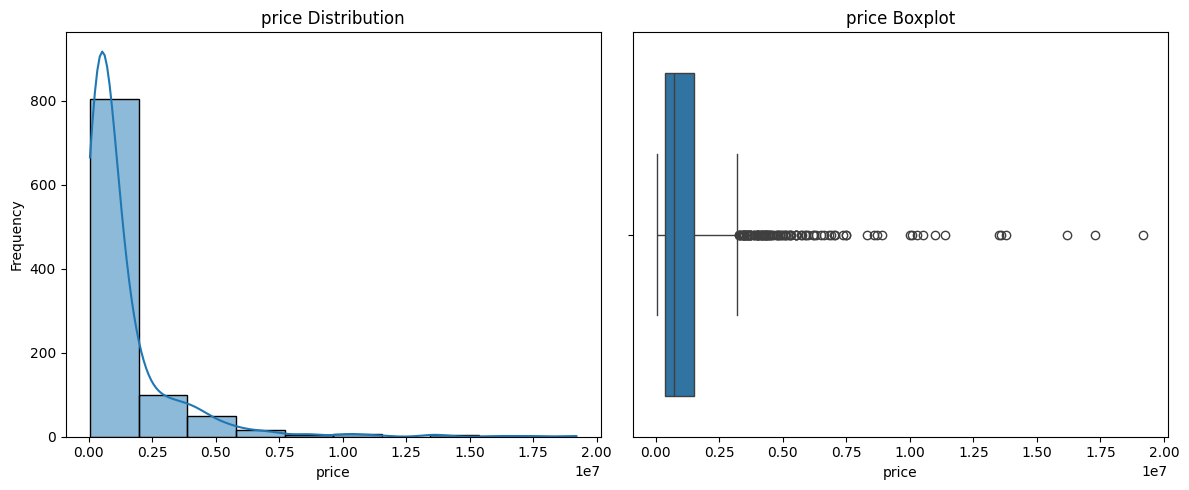

In [77]:
def histogram(df , field="price"):
  plt.figure(figsize=(12, 5))
  plt.subplot(1, 2, 1)
  sns.histplot(df[field], bins=10, kde=True)
  plt.title(f'{field} Distribution')
  plt.xlabel(field)
  plt.ylabel('Frequency')
  plt.subplot(1, 2, 2)
  sns.boxplot(x=df[field])
  plt.title(f'{field} Boxplot')
  plt.xlabel(field)
  plt.tight_layout()
  plt.show()

histogram(total)

In [90]:
pd.set_option('display.float_format', '{:.2f}'.format)
def statistics(df , field="price"):
  print(f"Statistics for {field}:")
  print(df[field].describe( percentiles=[0.25, 0.50, 0.75, 0.95]))
  if pd.api.types.is_numeric_dtype(df[field]):
     q1 = df[field].quantile(0.25)
     q3 = df[field].quantile(0.75)
     iqr = q3 - q1
     lower_bound = q1 - 1.5 * iqr
     upper_bound = q3 + 1.5 * iqr
     outliers = df[(df[field] < lower_bound) | (df[field] > upper_bound)]
     print(f"\nOutliers in {field}:", outliers.shape[0])

statistics(total, "price")


Statistics for price:
count        984.00
mean     1371684.91
std      1951147.16
min        45327.00
25%       349900.00
50%       713130.83
75%      1495621.02
95%      4793150.00
max     19197000.00
Name: price, dtype: float64

Outliers in price: 110


[]

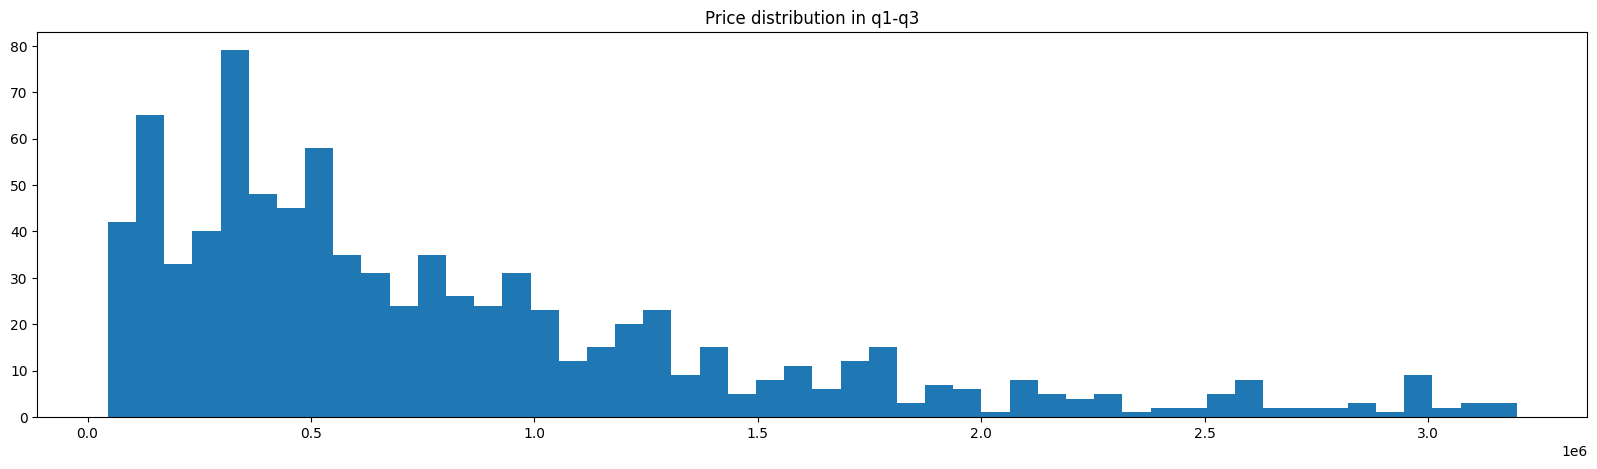

In [80]:
#Distribucion del precio en el rango intercuartilico
q1 = total["price"].quantile(0.25)
q3 = total["price"].quantile(0.75)
iqr = q3 - q1
plt.figure(figsize=(20, 5))
plt.hist(total.loc[total["price"] <= (q3 + 1.5 * iqr)]["price"], bins=50)
plt.title("Price distribution in q1-q3")
plt.plot()

**Atributo 2 Meses de garantia (warranty_months) - Analisis medidas de tendencia central y distribucion:**



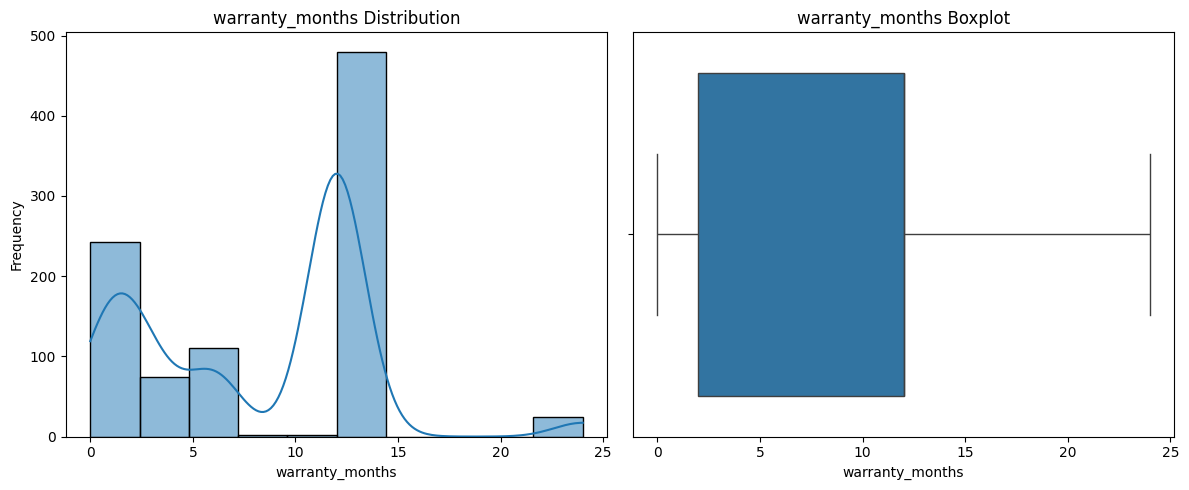

In [86]:
histogram(total, "warranty_months")

In [87]:
statistics(total, "warranty_months")

Statistics for warranty_months:
count   936.00
mean      8.10
std       5.46
min       0.00
25%       2.00
50%      12.00
75%      12.00
95%      12.00
max      24.00
Name: warranty_months, dtype: float64

Outliers in warranty_months: 0


**Atributo 3 Brand - Analisis medidas de tendencia central y distribucion:**

In [91]:
statistics(total, "brand")

Statistics for brand:
count        984
unique        80
top       Xiaomi
freq         152
Name: brand, dtype: object


In [98]:
def print_top(df,field="brand"):
   top_10_brands = total[field].value_counts().head(10).index.tolist()
   print(top_10_brands)

print_top(total)

['Xiaomi', 'Samsung', 'Motorola', 'Apple', 'Tecno', 'Generic', 'ZTE', 'Infinix', 'Oppo', 'Corn']


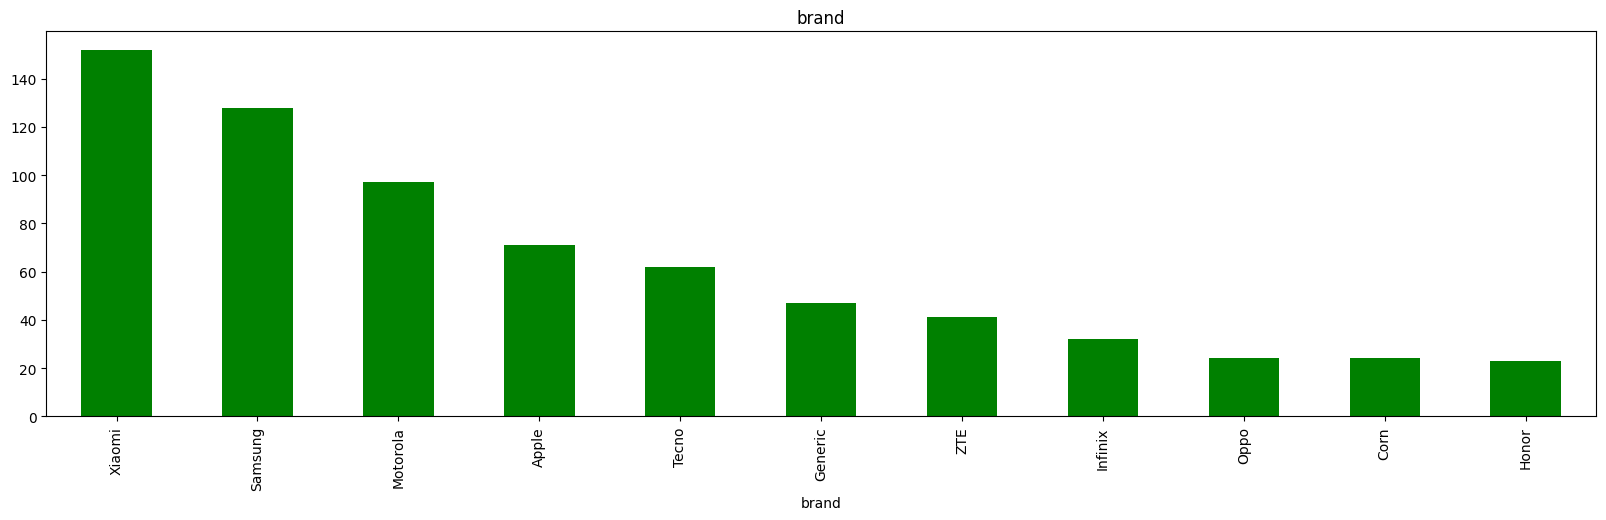

In [101]:
def histogram_object(df , field="brand"):
  qty=len(df[field].value_counts())
  data={}
  if qty > 10:
    data=df[field].value_counts()[:11]
  else:
    data=df[field].value_counts()
  fig, (ax1) = plt.subplots(1, sharey=True, figsize=(20, 5))
  data.plot(kind="bar", ax=ax1, color="green")
  ax1.set_title(field)
  plt.show()

histogram_object(total)

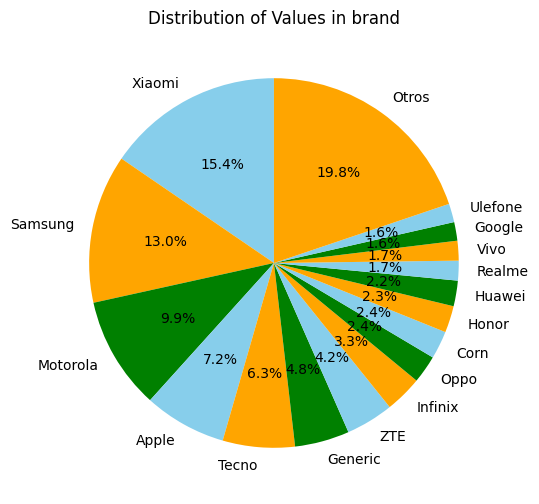

In [119]:
def print_pie(df, field="brand"):
  threshold=16
  value_counts = df[field].value_counts()
  qty=len(value_counts)
  if qty > threshold:
    other_cats_sum=value_counts[threshold:].sum()
    value_counts = value_counts[:threshold]
    value_counts['Otros'] = other_cats_sum
  else:
    value_counts = value_counts
  plt.figure(figsize=(6, 6))
  value_counts.plot.pie(autopct='%1.1f%%', startangle=90, colors=['skyblue', 'orange', 'green'])
  plt.ylabel('')  # Remove the y-axis label
  plt.title(f'Distribution of Values in {field}')
  plt.show()
print_pie(total)

**Atributo 4  Reputacion (seller_reputation) - Analisis medidas de tendencia central y distribucion:**

In [123]:
statistics(total, "seller_reputation_level_id")

Statistics for seller_reputation_level_id:
count         980
unique          3
top       5_green
freq          920
Name: seller_reputation_level_id, dtype: object


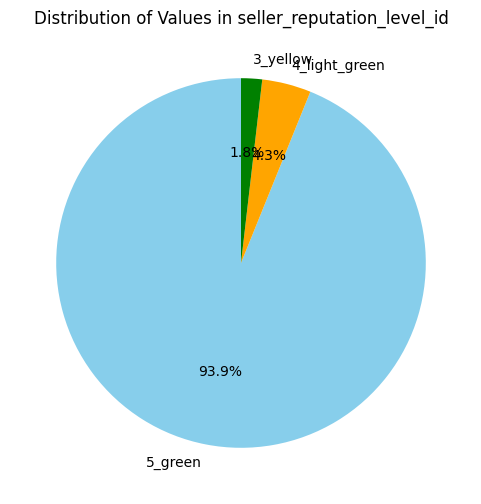

In [125]:
print_pie(total, "seller_reputation_level_id")

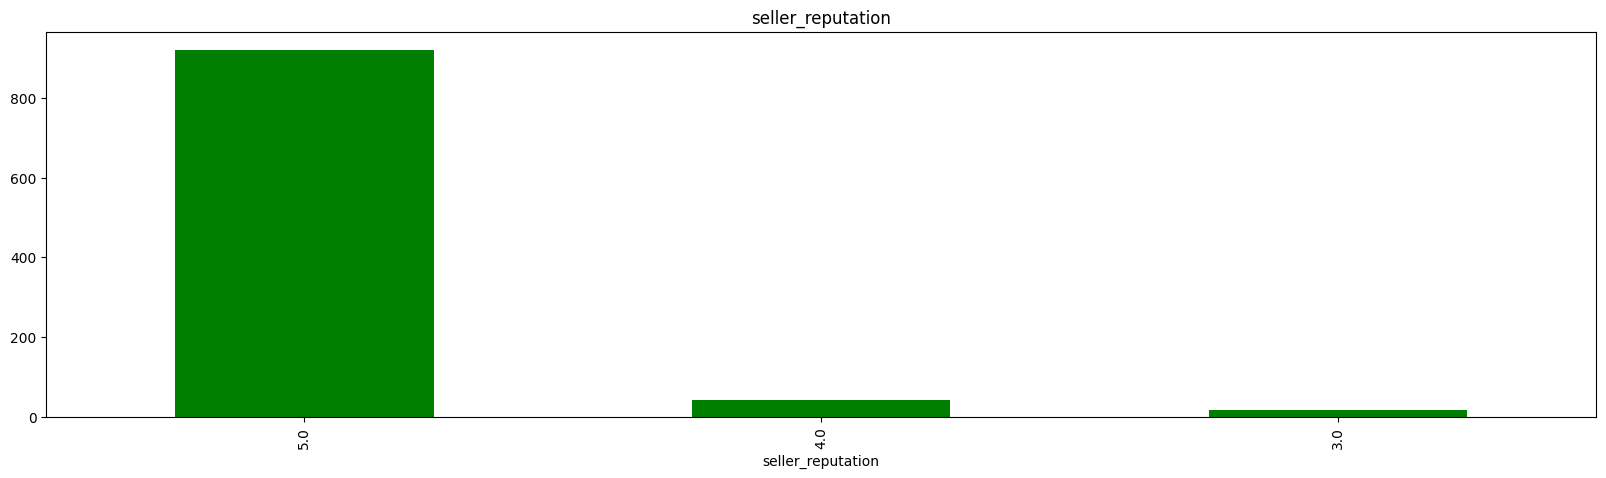

In [121]:
histogram_object(total, "seller_reputation")

In [124]:
field="seller_reputation_level_id"
total[field].value_counts(dropna=False, normalize=True)

,proportion
seller_reputation_level_id,
5_green,0.93
4_light_green,0.04
3_yellow,0.02
None,0.00


**Analisis de variabilidad:**

In [126]:
#variabilidad

# Calculando la cantidad de celulares disponibles
available_cells=total["available_quantity"].sum()
# Calculando la cantidad de referencias de celulares ofertados en el dataset
offerings=total["item_id"].nunique()
print("celulares disponibles:", available_cells)
print("referencias de celulares ofertados:", offerings)
# Calculando la cantidad de marcas
unique_brands=total["brand"].nunique()
print("brands unicas:", unique_brands)
# calculando las 10 marcas con mayor numero de referencias de celular ofertados
top_brands=total["brand"].value_counts(dropna=False).head(10).index.to_list()
print("top brands:", top_brands)

celulares disponibles: 70737
referencias de celulares ofertados: 984
brands unicas: 80
top brands: ['Xiaomi', 'Samsung', 'Motorola', 'Apple', 'Tecno', 'Generic', 'ZTE', 'Infinix', 'Oppo', 'Corn']


### **2.2 Analisis Bivariado**

Se examinan las relaciones:

*   Precio vs. brand
*   Precio vs. RAM
*   Precio vs. Almacenamiento
*   Calificacion vendedor vs. Tipo de tienda.


**2.2.1. Precio vs. Brand:**

top brand: ['Xiaomi', 'Samsung', 'Motorola', 'Apple', 'Tecno', 'Generic', 'ZTE', 'Infinix', 'Oppo', 'Corn']


<Figure size 12000x600 with 0 Axes>

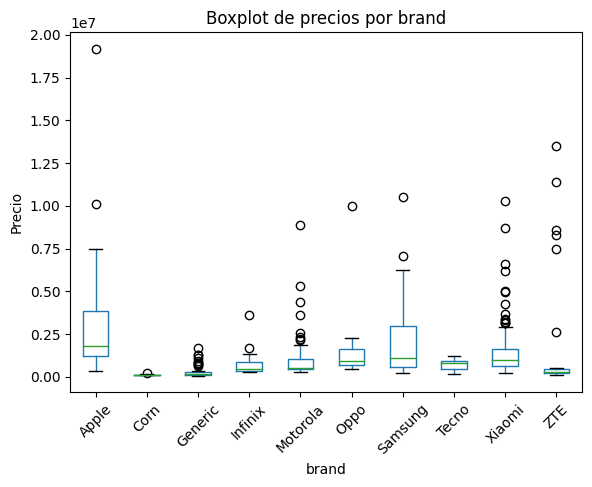

In [128]:
def comparative_boxplot(df, field):
  field_count = df[field].value_counts(dropna=False, normalize=True)
  top = field_count.index.tolist()
  if len(top) > 10:
    top = top[:10]
  print(f"top {field}:", top)
  plt.figure(figsize=(120, 6))
  total[df[field].isin(top  )].boxplot(column='price', by=field, grid=False)
  plt.title(f'Boxplot de precios por {field}')
  plt.suptitle('')  # Eliminar el título superior automático
  plt.xlabel(field)
  plt.ylabel('Precio')

  plt.xticks(rotation=45)
  plt.show()

comparative_boxplot(total, "brand")

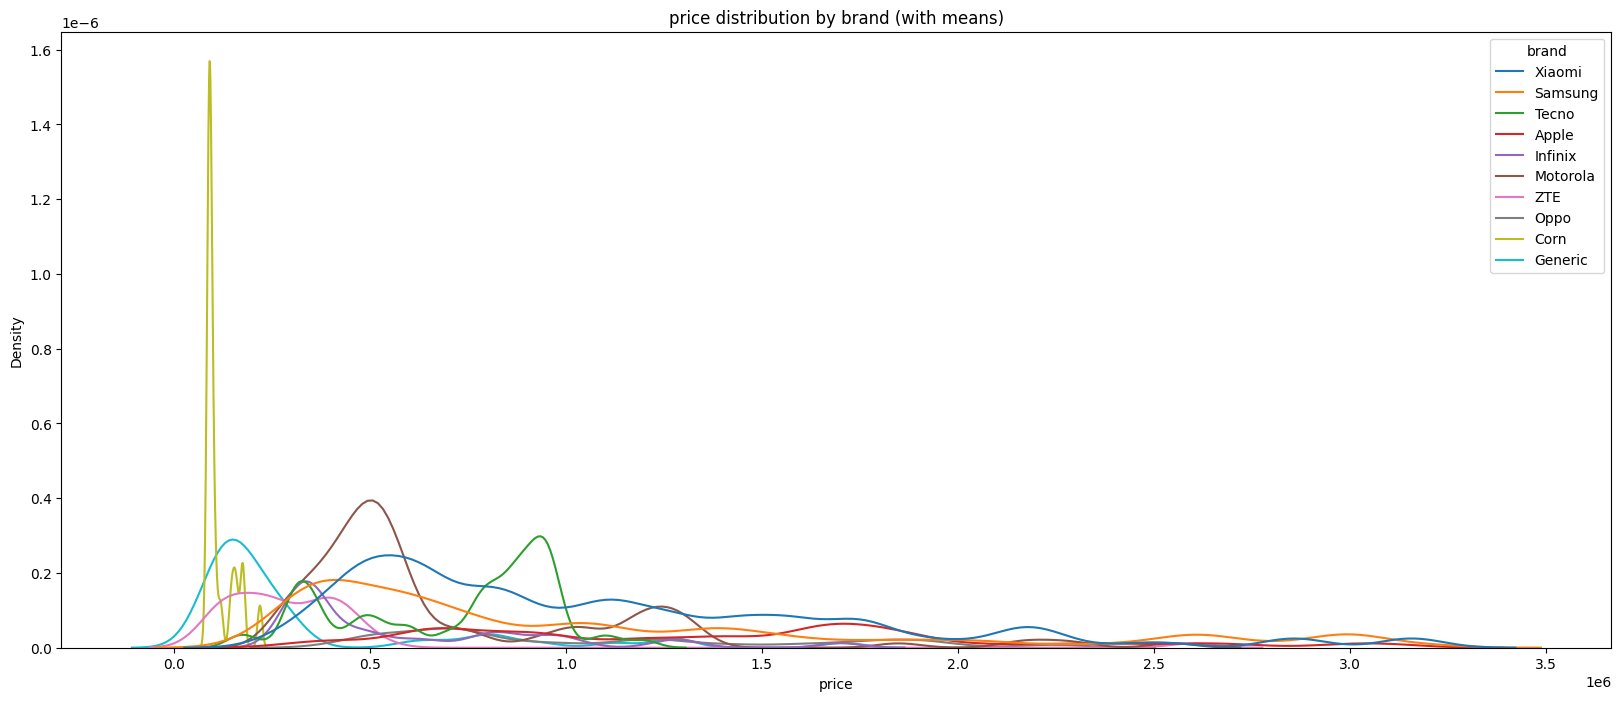

In [136]:
def line_graph(df, field="brand", x_var="price"):
  density_var=field

  top_brands = df[field].value_counts().head(10).index.tolist()
  marcas_frec_cumsum=df[field].value_counts(normalize=True).cumsum()

  q1 = df[x_var].quantile(0.25)
  q2 = df[x_var].quantile(0.50)
  q3 = df[x_var].quantile(0.75)

  fig, ax = plt.subplots(1, 1, figsize=(20, 8))
  sns.kdeplot(
      data=df.loc[df[x_var] <= (q3 + 1.5 * iqr)].loc[df[field].isin( top_brands )],
      x=x_var,
      hue=field,
      bw_adjust=.3,
      ax=ax
  )
  for (brand, color) in zip( marcas_frec_cumsum , ["steelblue", "orange", "green"]):
      ax.axvline(df.loc[df[ x_var ] <= (q3 + 1.5 * iqr)].loc[df[ density_var] == brand, density_var].mean(), color=color, linestyle="dashed", linewidth=2, ymax=0.2)
  plt.title(f"{x_var} distribution by {density_var} (with means)")
  plt.show()

line_graph(total, "brand")

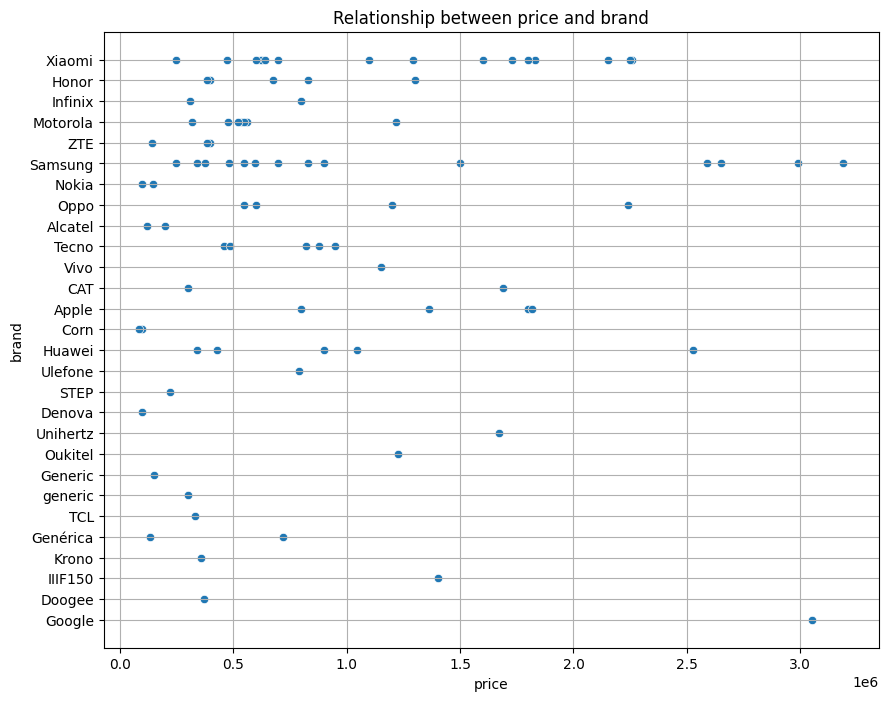

In [157]:
def print_relation(df, field_y, field_x="price", use_sample=False):
  q1 = df[field_x].quantile(0.25)
  q2 = df[field_x].quantile(0.50)
  q3 = df[field_x].quantile(0.75)
  iqr = q3 - q1
  total_sample_df =  df.loc[df[field_x] <= (q3 + 1.5 * iqr)].sample(frac=0.1)
  if use_sample:
    total_sample_df = df

  plt.figure(figsize=(10, 8))
  sns.scatterplot(
      x=total_sample_df[field_x],
      y=total_sample_df[field_y]
  )
  plt.title(f"Relationship between {field_x} and {field_y}")
  plt.grid()
  plt.show()

print_relation(total, "brand")

In [138]:
# Calculando las 10 marcas de celulares mas costosos
baratos=total[total["price"] >= (q3)]
expensive_brands=baratos["brand"].value_counts(dropna=False).head(10).index.to_list()
print(expensive_brands)

['Samsung', 'Apple', 'Xiaomi', 'Google', 'Motorola', 'CAT', 'Huawei', 'Oppo', 'Sony', 'ZTE']


In [139]:
# Calculando las 10 marcas de celulares mas economicos
baratos=total[total["price"] <= (q1)]
cheap_brands=baratos["brand"].value_counts(dropna=False).head(10).index.to_list()
print(cheap_brands)


['Generic', 'Corn', 'ZTE', 'Alcatel', 'Samsung', 'Nokia', 'Infinix', 'Tecno', 'Motorola', 'Genérica']


**2.2.2. Precio vs. RAM:**

top ram_mb: [8192.0, 4096.0, 12288.0, 6144.0, 3072.0, 16384.0, 2048.0, 1024.0, 32.0, nan]


<Figure size 12000x600 with 0 Axes>

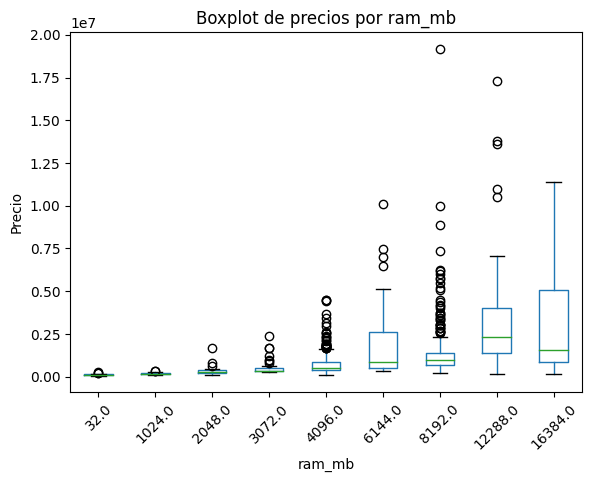

In [158]:
comparative_boxplot(total, "ram_mb")


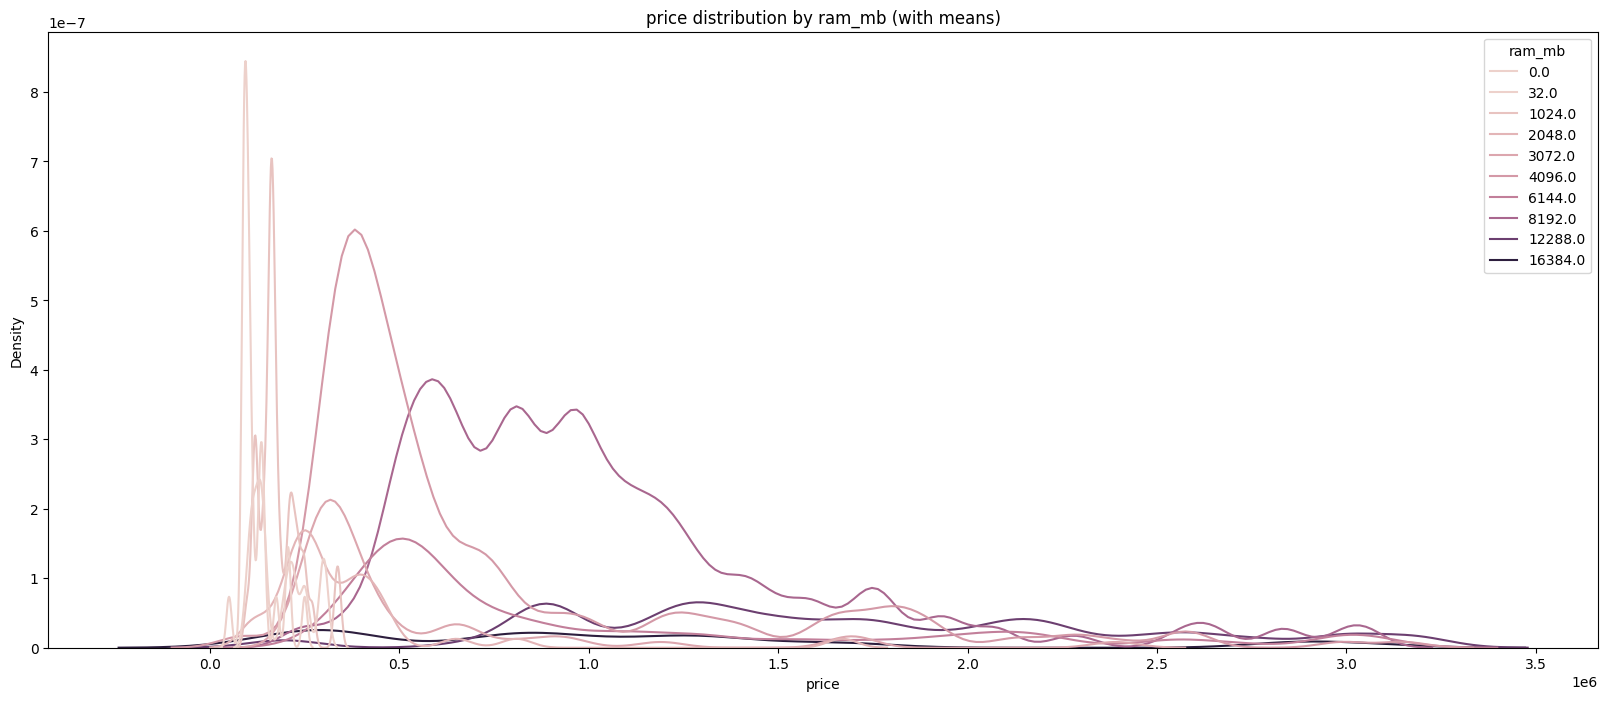

In [160]:
line_graph(total, "ram_mb")


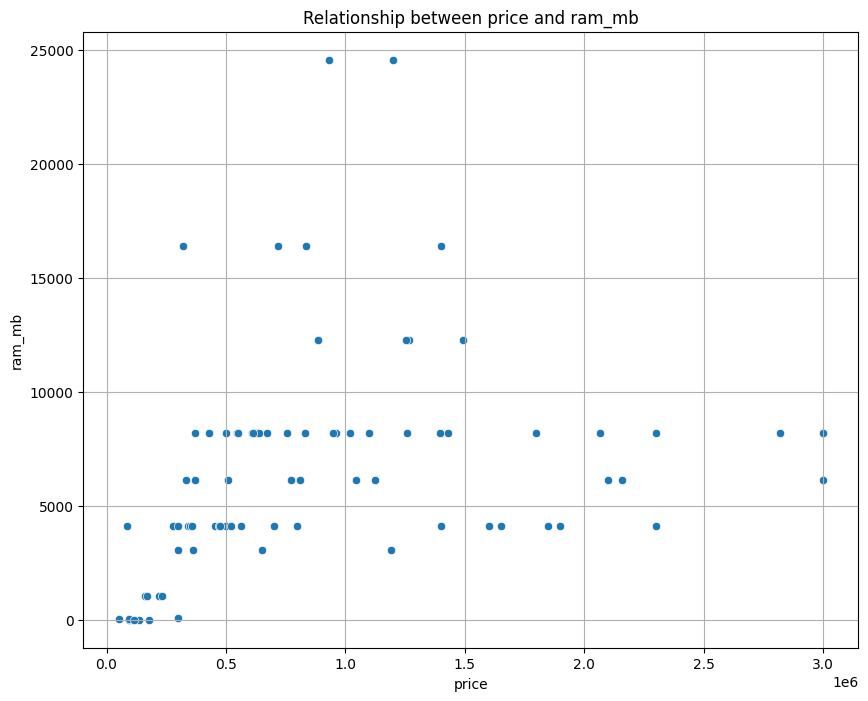

In [161]:

print_relation(total, "ram_mb")

**2.2.3. Precio vs. Almacenamiento:**

top internal_memory_mb: [262144.0, 131072.0, 65536.0, 524288.0, 32768.0, 32.0, 16384.0, 128.0, nan, 0.0]


<Figure size 12000x600 with 0 Axes>

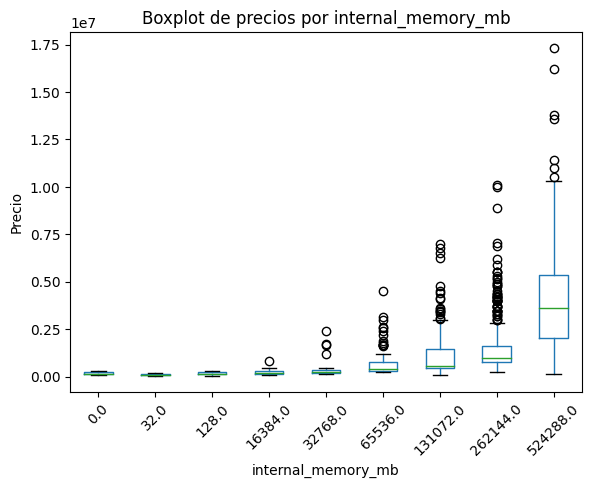

In [162]:
comparative_boxplot(total, "internal_memory_mb")


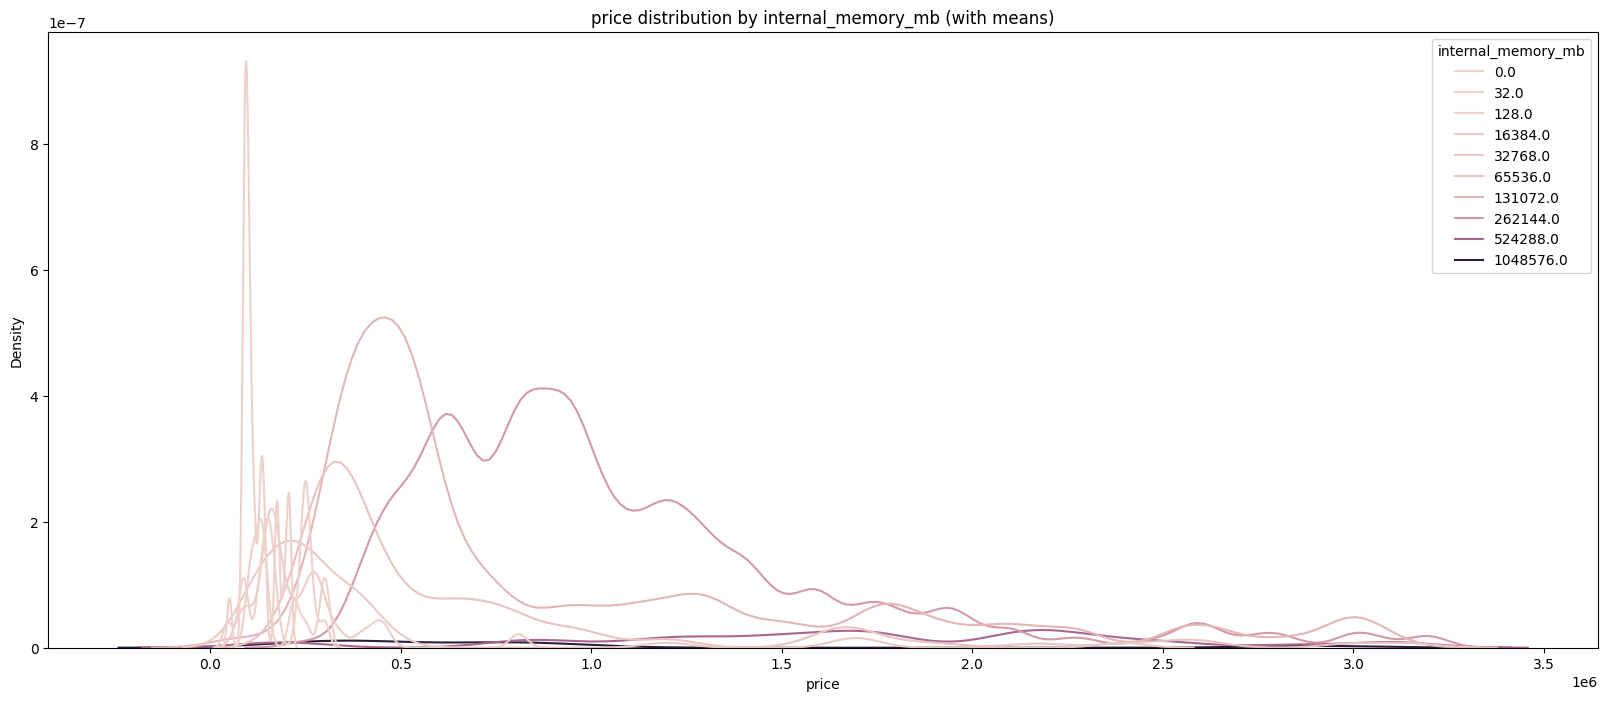

In [164]:
line_graph(total, "internal_memory_mb")

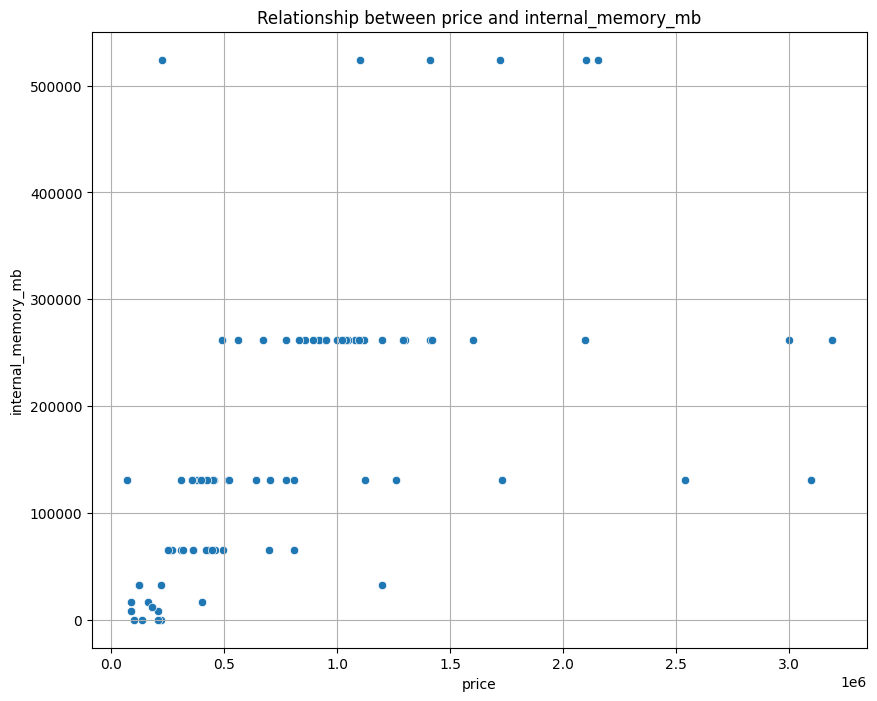

In [165]:

print_relation(total, "internal_memory_mb")

**2.2.4. Calificacion vendedor vs. Tipo de tienda.:**

In [166]:
def print_pivot(df, field_x="seller_reputation", field_y="has_official_store"):
  #df[field_x] = df[field_x].astype(int)
  df[field_y] = df[field_y].astype(int)
  pivot_table = pd.pivot_table(total,
                             values=field_y,  # Summarizing the seller reputation
                             index=field_x,  # Group by official store status
                             aggfunc='sum',  #
                             fill_value=0)  # Fill NaN with 0
  print(pivot_table)
print_pivot(total, "seller_reputation", "has_official_store")

                   has_official_store
seller_reputation                    
3.00                                0
4.00                                8
5.00                               76


# **3. Diseño y desarrollo de la estrategia de recomendacion **

In [ ]:
#listings_df["availability_365"] = listings_df["availability_365"].astype(float)
field="warranty_months"
total[field].describe(percentiles=[0.25, 0.5, 0.75])

,warranty_months
count,936.00
mean,8.10
std,5.46
min,0.00
25%,2.00
50%,12.00
75%,12.00
max,24.00


[]

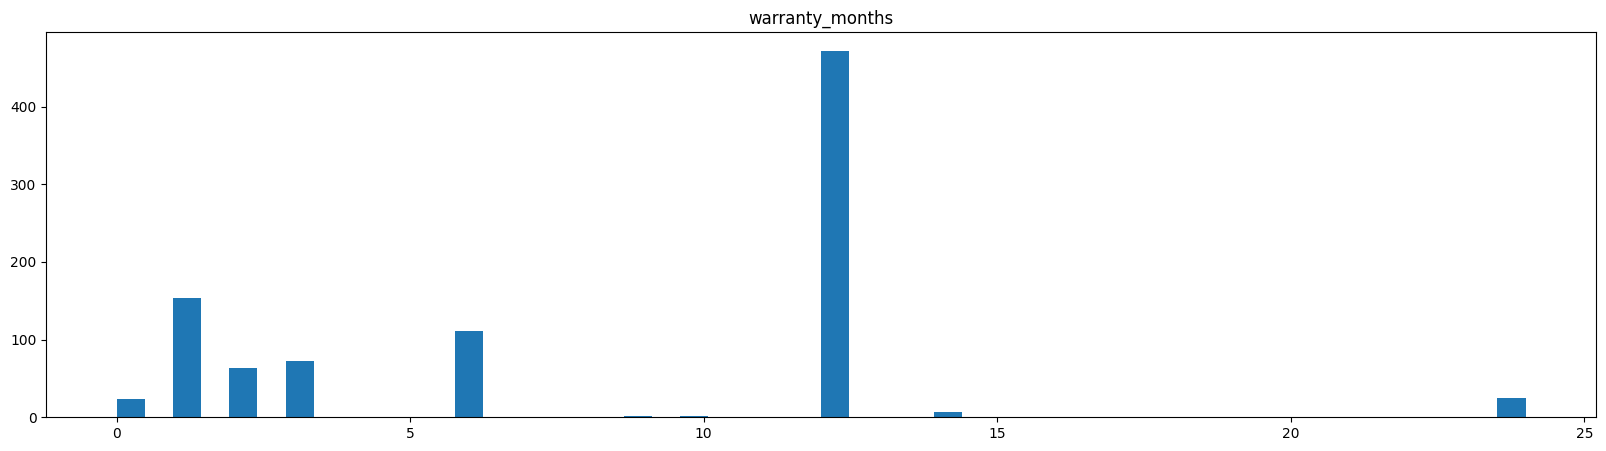

In [ ]:
plt.figure(figsize=(20, 5))
plt.hist(total[field], bins=50)
plt.title(field)
plt.plot()

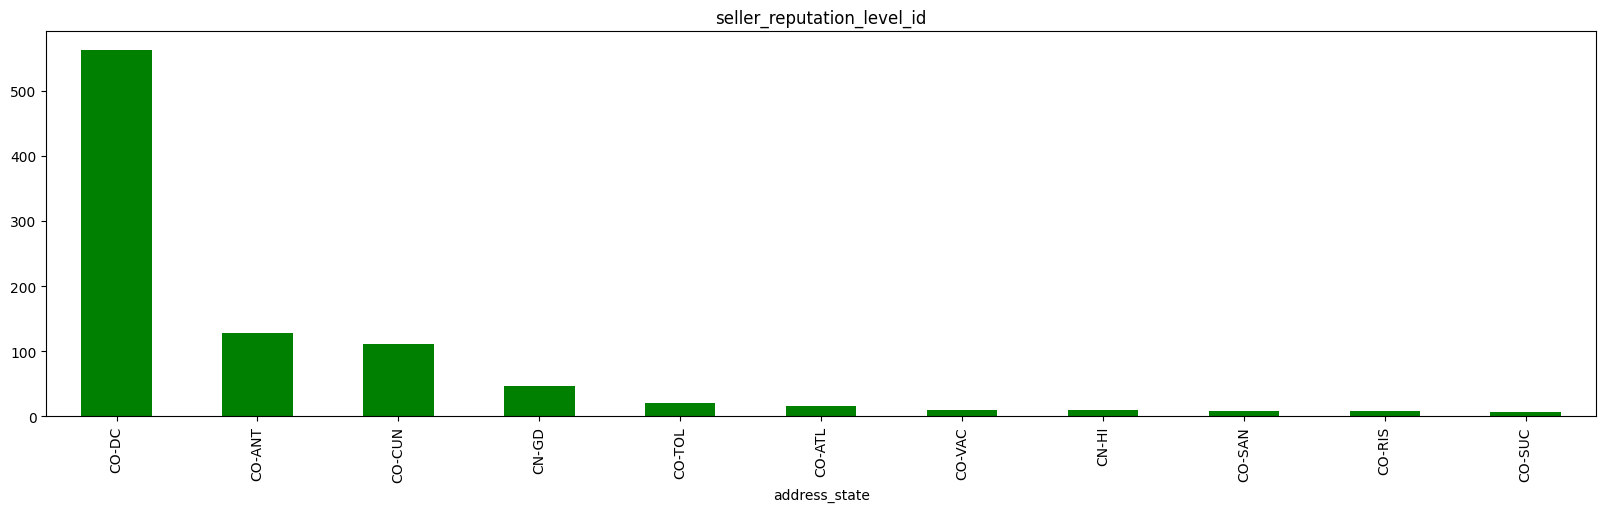

In [ ]:
fig, (ax1) = plt.subplots(1, sharey=True, figsize=(20, 5))
total["address_state"].value_counts()[:11].plot(kind="bar", ax=ax1, color="green")
ax1.set_title(field)
plt.show()

In [ ]:
selected=total
print("inicial:",selected.shape)

selected=total[ total["price"]<=1200000]
print("price:",selected.shape)
selected=selected[ selected["accepts_mercadopago"]==True]
print("mercadopago:",selected.shape)
selected=selected[ selected["installments_quantity"]>0]
print("installments_quantity:",selected.shape)
selected=selected[ selected["seller_reputation_level_id"]=="5_green"]
print("reputation:",selected.shape)
selected=selected[ selected["official_store_id"].notna()]
print("official_store:",selected.shape)
selected=selected[ selected["warranty"].notna()]
print("warranty:",selected.shape)
selected=selected[ selected["address_state"]=="CO-DC"]
print("address_state:",selected.shape)
selected=selected[ selected["condition"]=="new"]
print("condition:",selected.shape)
selected=selected[ selected["free_shipping"]==True]
print("free_shipping:",selected.shape)
#-precio <= 1200000 (items price)
#-preferible a cuotas (non_mercado_pago_payment_methods)
#-marca, color, tamano de pantalla ideal para mama.
#-preferible tienda oficial (official_store_id)
#-garantia >= 6 meses (items warranty)
#-envio gratis. (shipping)

#-alrededores de bogota. (seller address)
#-vendedor con buena reputacion.  (seller reputation)


price: (680, 21)
mercadopago: (680, 21)
installments_quantity: (680, 21)
reputation: (637, 21)
official_store: (56, 21)
warranty: (54, 21)
address_state: (9, 21)
condition: (9, 21)
free_shipping: (9, 21)


In [ ]:
# Calculando estadisticos para el precio
pd.set_option('display.float_format', '{:.2f}'.format)
total["price"].describe(percentiles=[0.25, 0.5, 0.75])

,price
count,984.00
mean,1371684.91
std,1951147.16
min,45327.00
25%,349900.00
50%,713130.83
75%,1495621.02
max,19197000.00


[]

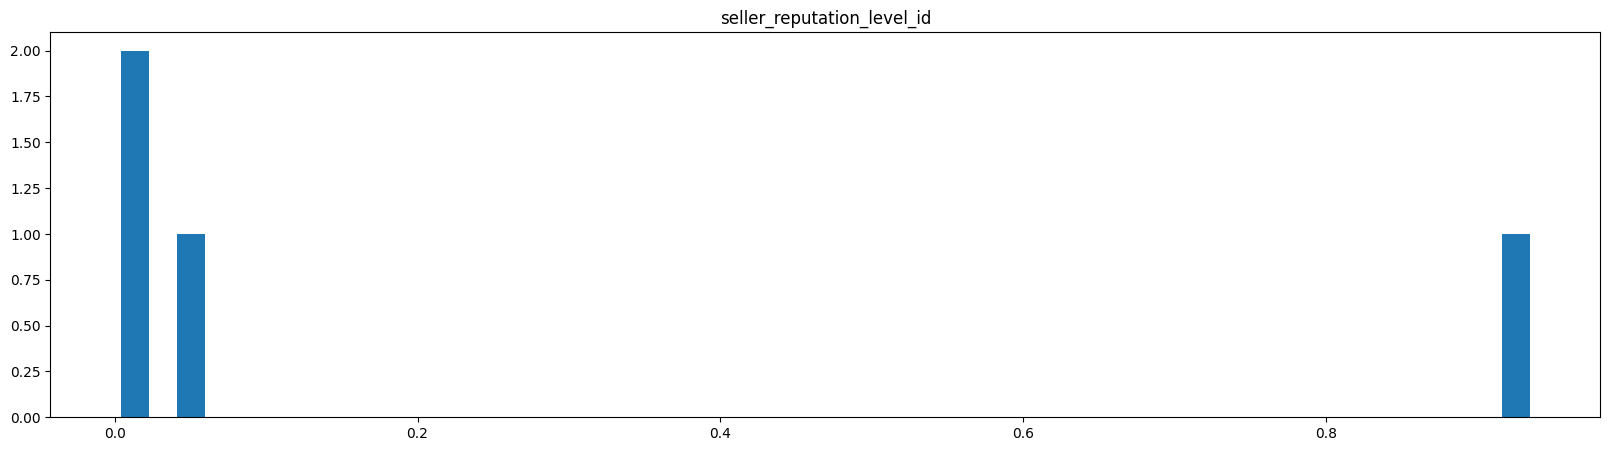

In [ ]:
plt.figure(figsize=(20, 5))
plt.hist(total[field].value_counts(dropna=False, normalize=True), bins=50)
plt.title(field)
plt.plot()

['Xiaomi', 'Samsung', 'Motorola', 'Apple', 'Tecno', 'Generic', 'ZTE', 'Infinix', 'Oppo', 'Corn', 'Honor']


<Figure size 12000x600 with 0 Axes>

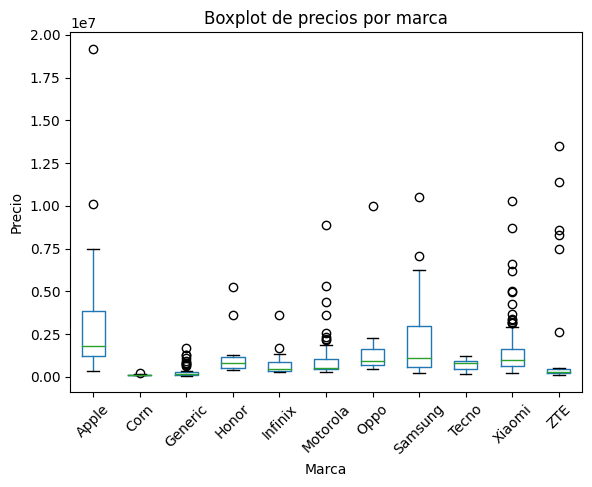

In [ ]:
brands_count = total['brand'].value_counts(dropna=False, normalize=True)[:11]

# Extraer las marcas (los índices de la serie)
top_brands = brands_count.index.tolist()

# Mostrar las marcas extraídas
print(top_brands)

plt.figure(figsize=(120, 6))
# Crear un boxplot para cada marca
total[total["brand"].isin(top_brands  )].boxplot(column='price', by='brand', grid=False)

# Ajustar título y etiquetas
plt.title('Boxplot de precios por marca')
plt.suptitle('')  # Eliminar el título superior automático
plt.xlabel('Marca')
plt.ylabel('Precio')

# Rotar las etiquetas del eje x
plt.xticks(rotation=45)

# Ajustar los márgenes para dar más espacio a las etiquetas
#plt.subplots_adjust(bottom=0.2)  # Aumentar el espacio inferior para las etiquetas


# Mostrar el gráfico
plt.show()

['Android', None, 'iOS', 'Android 14', 'S30+', 'Dumbphone OS', 'technology', 'ANDROID GO', 'Nokia', 'Other', 'HyperOS']


<Figure size 12000x600 with 0 Axes>

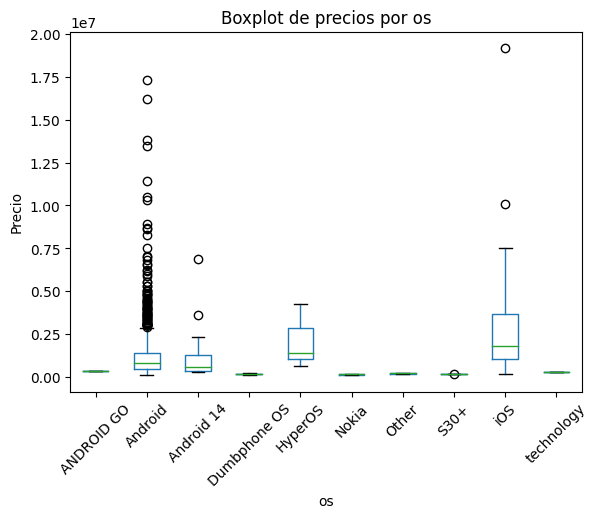

In [ ]:
field="os"
field_count = total[field].value_counts(dropna=False, normalize=True)[:11]

# Extraer las marcas (los índices de la serie)
top = field_count.index.tolist()

# Mostrar las marcas extraídas
print(top)

plt.figure(figsize=(120, 6))
# Crear un boxplot para cada marca
total[total[field].isin(top  )].boxplot(column='price', by=field, grid=False)

# Ajustar título y etiquetas
plt.title(f'Boxplot de precios por {field}')
plt.suptitle('')  # Eliminar el título superior automático
plt.xlabel(field)
plt.ylabel('Precio')

# Rotar las etiquetas del eje x
plt.xticks(rotation=45)

# Ajustar los márgenes para dar más espacio a las etiquetas
#plt.subplots_adjust(bottom=0.2)  # Aumentar el espacio inferior para las etiquetas


# Mostrar el gráfico
plt.show()

Qué tantas opciones (variabilidad) en funcion de la marca, precio u otros dos atributos relevantes hay en los celulares disponibles?

In [ ]:
# Variabilidad de la marca
marcas_unicas = total['brand'].nunique()
print(f"Marcas diferentes: {marcas_unicas}")

# Distribución del precio
rango_precios = total['price'].min(), total['price'].max()
print(f"Rango de precios: {rango_precios}")

# Variabilidad en reputacion del vendedor
reputaciones_unicas = total["seller_reputation_level_id"].nunique()
print(f"Reputaciones diferentes: {reputaciones_unicas}")

# Variabilidad en meses de garantia
meses_garantia_unicos = total['warranty_months'].nunique()
print(f"Opciones de meses de garantia diferentes: {meses_garantia_unicos}")

# Estadísticas descriptivas para ver más detalles
print(total[["price","installments_quantity","warranty_months"]].describe())

Marcas diferentes: 80
Rango de precios: (45327.0, 19197000.0)
Reputaciones diferentes: 3
Opciones de meses de garantia diferentes: 12
            price  installments_quantity  warranty_months
count      984.00                 984.00           936.00
mean   1371684.91                  30.37             8.10
std    1951147.16                  10.18             5.46
min      45327.00                  12.00             0.00
25%     349900.00                  36.00             2.00
50%     713130.83                  36.00            12.00
75%    1495621.02                  36.00            12.00
max   19197000.00                  36.00            24.00


# **3. Diseño y desarrollo de estrategia de recomendación**


3.1. Diseño: Para encontrar el mejor celular para mamá, se buscará el celular con el .


3.2. Proceso de seleccion del o de los tipos de celulares deseados. Prueba estadistica para asegurar la significancia estadistica en la seleccion.

3.3. Desarrollo del proceso para recomendar el celular que se debe comprar.

# **4. Desarrollo de la Estrategia**

In [ ]:
# Extraccion de la muestra aleatoria dado el tamaño del dataset
listings_sample_df =  listings_df.loc[listings_df["price_float"] <= (q3 + 1.5 * iqr)].sample(frac=0.1)
listings_sample_df.shape

(571, 76)

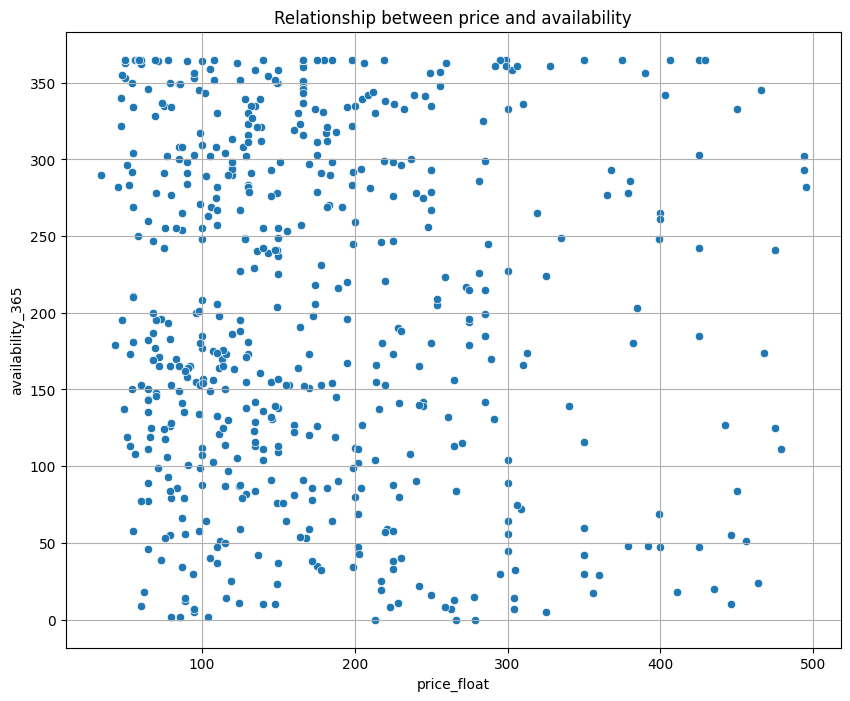

In [ ]:
# Identificando correlacion entre el precio y la disponibilidad
plt.figure(figsize=(10, 8))
sns.scatterplot(
    x=listings_sample_df["price_float"],
    y=listings_sample_df["availability_365"]
)
plt.title("Relationship between price and availability")
plt.grid()
plt.show()

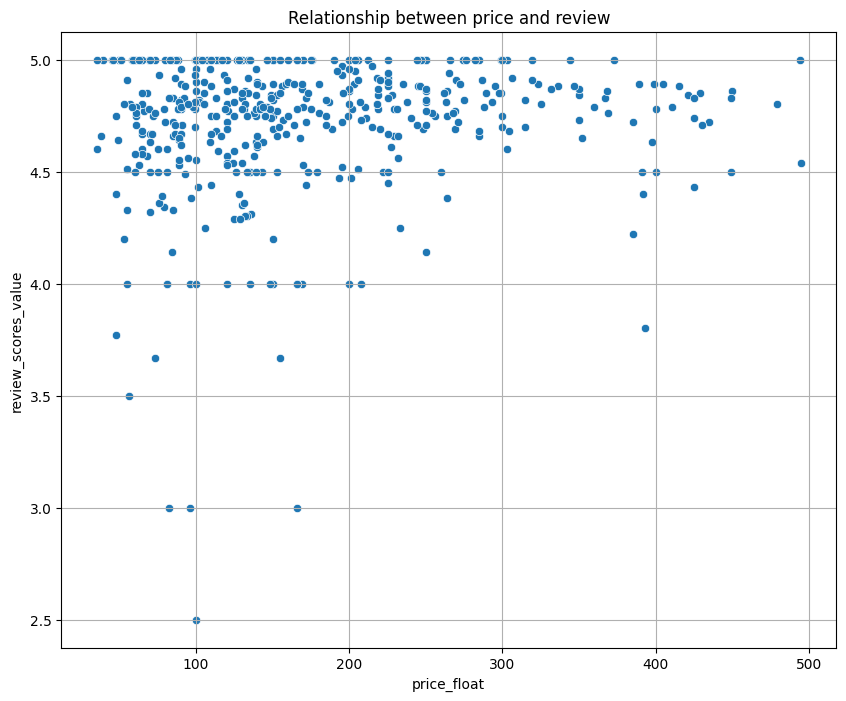

In [ ]:
# Identificando correlacion entre el precio y la calificacion dada por el cliente
plt.figure(figsize=(10, 8))
sns.scatterplot(
    x=listings_sample_df["price_float"],
    y=listings_sample_df["review_scores_value"]
)
plt.title("Relationship between price and review")
plt.grid()
plt.show()

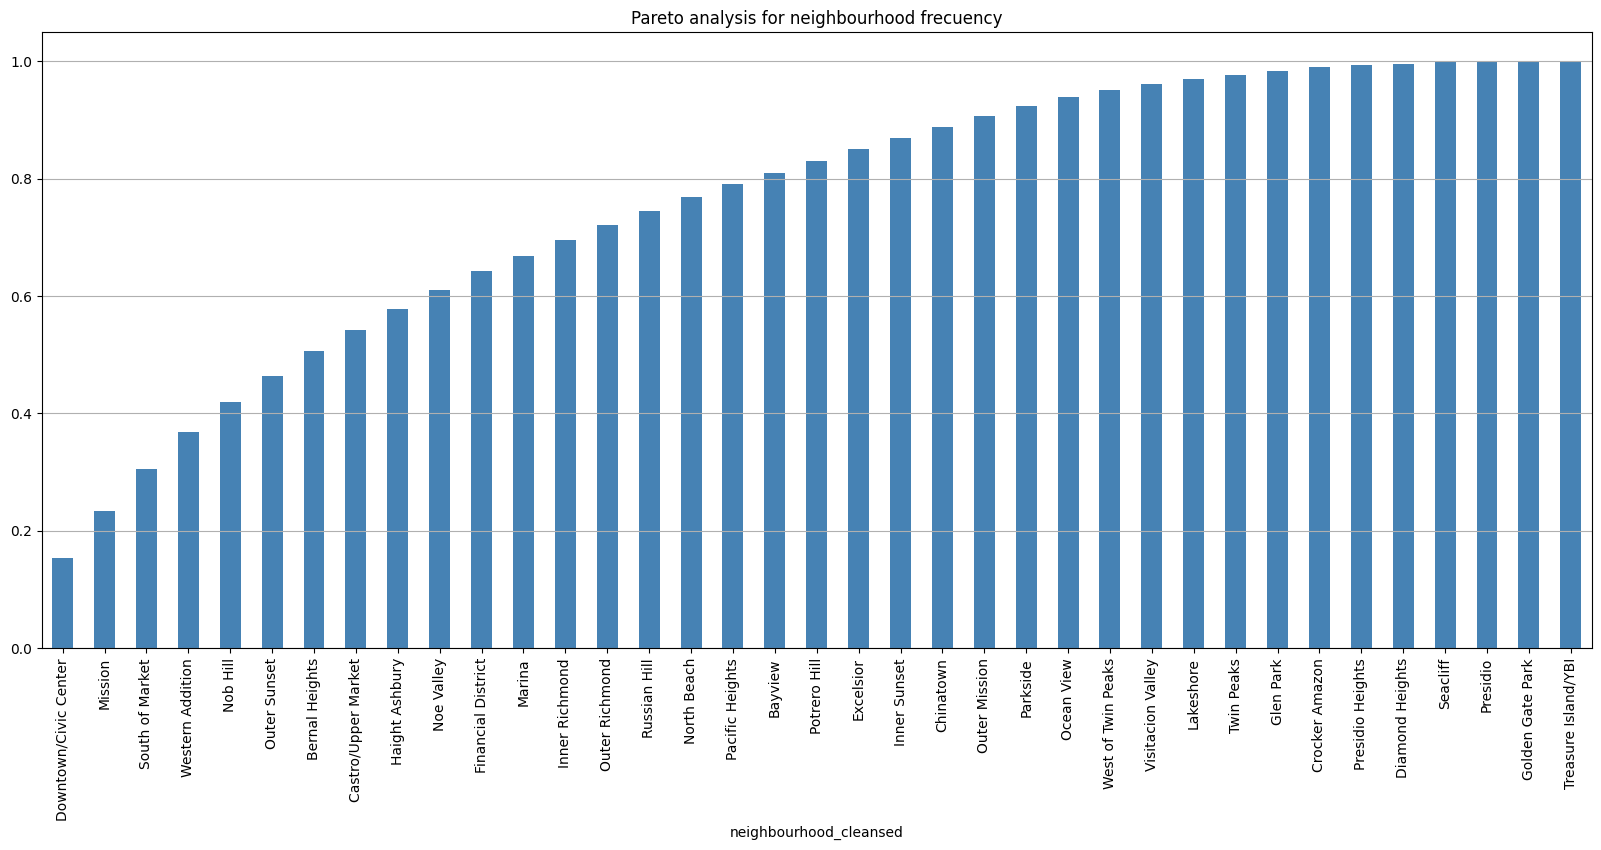

In [ ]:
##Identificando los vecindarios con mayor oferta
#Sumarizando la frecuencia de oferta de cada vecindario
neighbourhood_frec_cumsum = listings_df["neighbourhood_cleansed"].value_counts(normalize=True).cumsum()
# Plotting pareto analysis for neighbourhood frecuency
plt.figure(figsize=(20, 8))
neighbourhood_frec_cumsum.plot(kind="bar", color="steelblue")
plt.title("Pareto analysis for neighbourhood frecuency")
plt.grid(axis="y")
plt.show()

In [ ]:
#Listando los vecindarios mas representivos (los que representan el 80% de la oferta)
most_representative_neighbourhoods = neighbourhood_frec_cumsum.loc[neighbourhood_frec_cumsum < 0.8].index.tolist()
most_representative_neighbourhoods

['Downtown/Civic Center',
 'Mission',
 'South of Market',
 'Western Addition',
 'Nob Hill',
 'Outer Sunset',
 'Bernal Heights',
 'Castro/Upper Market',
 'Haight Ashbury',
 'Noe Valley',
 'Financial District',
 'Marina',
 'Inner Richmond',
 'Outer Richmond',
 'Russian Hill',
 'North Beach',
 'Pacific Heights']

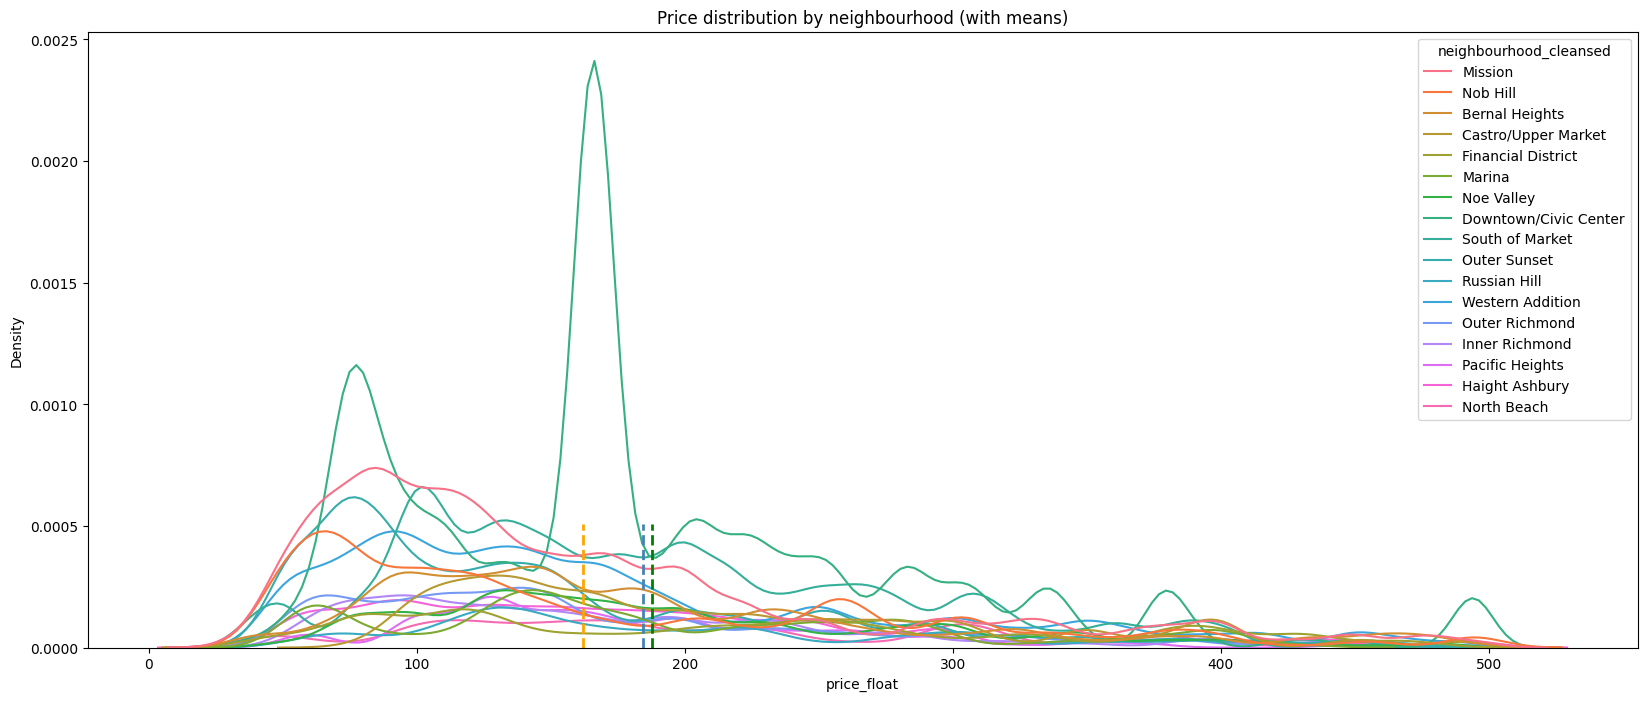

In [ ]:
# Distribucion del precio por noche en los vecindarios mas representativos
fig, ax = plt.subplots(1, 1, figsize=(20, 8))
sns.kdeplot(
    data=listings_df.loc[listings_df["price_float"] <= (q3 + 1.5 * iqr)].loc[listings_df["neighbourhood_cleansed"].isin(most_representative_neighbourhoods)],
    x="price_float",
    hue="neighbourhood_cleansed",
    bw_adjust=.3,
    ax=ax
)
for (neighbourhood, color) in zip(most_representative_neighbourhoods, ["steelblue", "orange", "green"]):
    ax.axvline(listings_df.loc[listings_df["price_float"] <= (q3 + 1.5 * iqr)].loc[listings_df["neighbourhood_cleansed"] == neighbourhood, "price_float"].mean(), color=color, linestyle="dashed", linewidth=2, ymax=0.2)
plt.title("Price distribution by neighbourhood (with means)")
plt.show()

In [ ]:
#Calculamos la ocupacion con base en la disponibilidad (availability_365)
listings_df["ocupacion"] = 365 - listings_df["availability_365"].astype(float)

In [ ]:
listings_df["ocupacion"].describe(percentiles=[0.25, 0.5, 0.75])

,ocupacion
count,7888.00
mean,192.36
std,127.85
min,0.00
25%,71.00
50%,200.00
75%,314.00
max,365.00


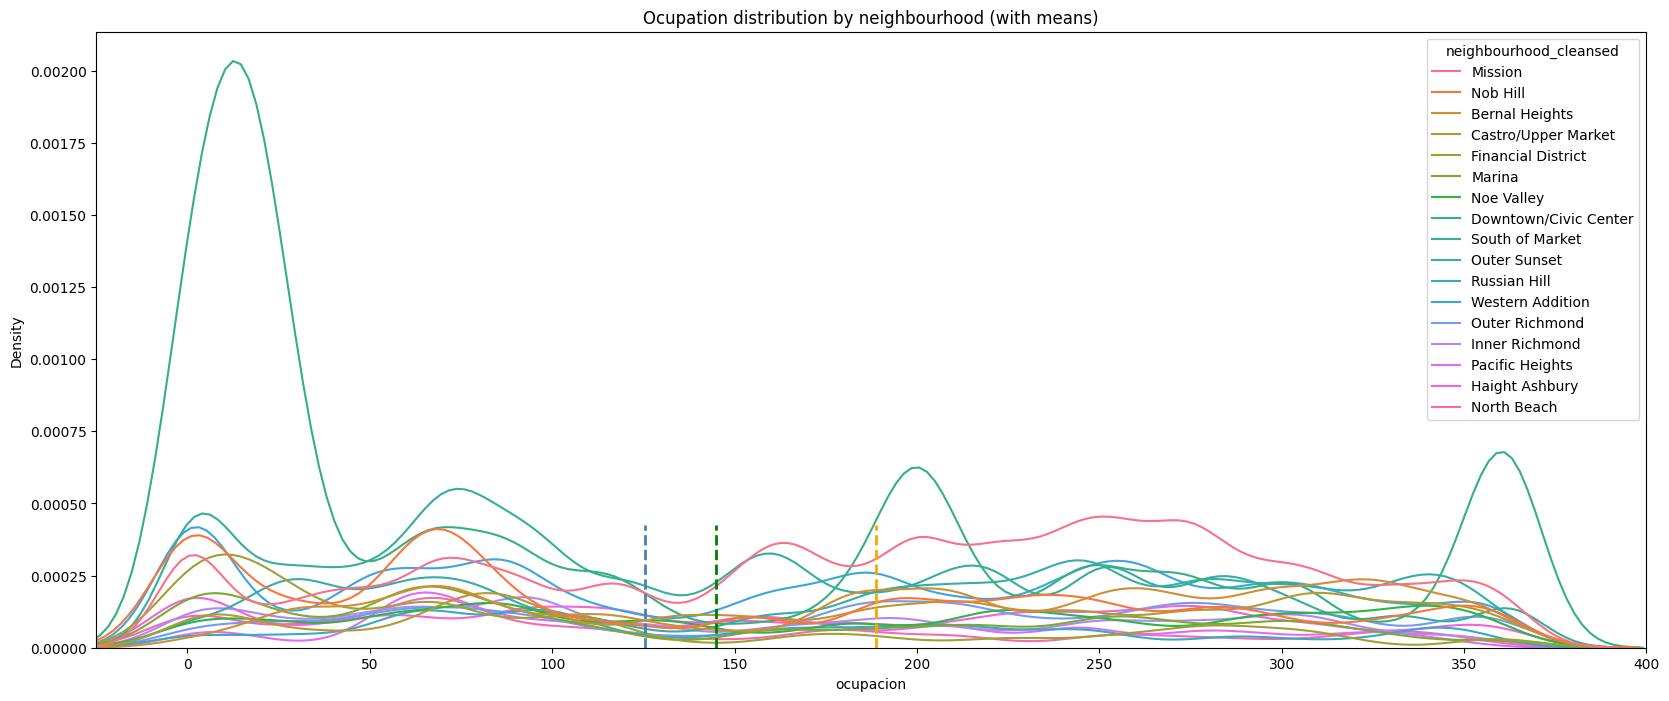

In [ ]:
# Distribucion de la ocupacion en los vecindarios mas representativos
fig, ax = plt.subplots(1, 1, figsize=(20, 8))
sns.kdeplot(
    data=listings_df.loc[listings_df["price_float"] <= (q3 + 1.5 * iqr)].loc[listings_df["neighbourhood_cleansed"].isin(most_representative_neighbourhoods)],
    x="ocupacion",
    hue="neighbourhood_cleansed",
    bw_adjust=.3,
    ax=ax
)
for (neighbourhood, color) in zip(most_representative_neighbourhoods, ["steelblue", "orange", "green"]):
    ax.axvline(listings_df.loc[listings_df["price_float"] <= (q3 + 1.5 * iqr)].loc[listings_df["neighbourhood_cleansed"] == neighbourhood, "ocupacion"].mean(), color=color, linestyle="dashed", linewidth=2, ymax=0.2)
plt.title("Ocupation distribution by neighbourhood (with means)")
plt.xlim([-25, 400])
plt.show()

In [ ]:
#Nuevo dataset filtrado con los vecindarios mas representativos
listings_most_representative_df = listings_df[listings_df['neighbourhood_cleansed'].isin(most_representative_neighbourhoods)]
listings_most_representative_df.shape

(6233, 77)

In [ ]:
#Calcula una nueva columna con la RENTABILIDAD basado en la ocupacion y el precio
listings_most_representative_df.loc[:, "rentability"] = listings_most_representative_df["ocupacion"] * listings_most_representative_df["price_float"]


<ipython-input-29-109c41f7a615>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  listings_most_representative_df.loc[:, "rentability"] = listings_most_representative_df["ocupacion"] * listings_most_representative_df["price_float"]


In [ ]:
#Genera una caracterizacion de la variable rentabilidad
listings_most_representative_df["rentability"] = listings_most_representative_df["rentability"].astype(float)
listings_most_representative_df['rentability'].describe([0.25, 0.5, 0.75, 0.95]).apply(lambda x: format(x, 'f'))

<ipython-input-79-6ab0ec2b66d1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  listings_most_representative_df["rentability"] = listings_most_representative_df["rentability"].astype(float)


,rentability
count,4839.000000
mean,41017.501757
std,91123.202183
min,0.000000
25%,7968.000000
50%,21000.000000
75%,46162.500000
95%,127200.000000
max,2016465.000000


### Teniendo en cuenta que la dispersion de la rentabilidad en los vecindarios mas representativos es alta, realizaremos un analisis de variablidad con el rango intercuartilico para identificar segmentos de interes para inversion reduciendo el impacto de los outliers.

In [ ]:
# Analisis de variabilidad con el rango intercuartilico
q1_renta = listings_most_representative_df["rentability"].quantile(0.25)
q2_renta = listings_most_representative_df["rentability"].quantile(0.50)
q3_renta = listings_most_representative_df["rentability"].quantile(0.75)
q4_renta = listings_most_representative_df["rentability"].quantile(0.95)
iqr_renta = q3_renta - q1_renta


In [ ]:
# Se identifican los vecindarios que estan dentro del rango intercuartilico del 1 al 3 y se ordena por el promedio de rentabilidad
pd.set_option('display.float_format', '{:.2f}'.format)
data_q1_q3=listings_most_representative_df.loc[(listings_most_representative_df["rentability"] >=(q1_renta))&(listings_most_representative_df["rentability"] <=(q3_renta))]
portafolio_conservador=data_q1_q3.groupby(["neighbourhood_cleansed"])["rentability"].agg(["count", "mean"]).reset_index().sort_values(by="mean", ascending=False)
portafolio_conservador

,neighbourhood_cleansed,count,mean
1,Castro/Upper Market,114,27073.86
0,Bernal Heights,164,25281.51
12,Outer Sunset,184,25134.53
9,Noe Valley,105,24689.30
5,Inner Richmond,85,24497.76
6,Marina,76,23607.89
13,Pacific Heights,80,23427.45
11,Outer Richmond,106,23237.81
4,Haight Ashbury,98,22815.90
16,Western Addition,201,22767.80


In [ ]:
# Se identifican los vecindarios que estan dentro del rango intercuartilico del 2 al 4 y se ordena por el promedio de rentabilidad
pd.set_option('display.float_format', '{:.2f}'.format)
data_q2_q4=listings_most_representative_df.loc[(listings_most_representative_df["rentability"] >=(q2_renta))&(listings_most_representative_df["rentability"] <=(q4_renta))]
portafolio_medio=data_q2_q4.groupby(["neighbourhood_cleansed"])["rentability"].agg(["sum","count", "mean"]).reset_index().sort_values(by="mean", ascending=False)
portafolio_medio

,neighbourhood_cleansed,sum,count,mean
10,North Beach,2674281.00,44,60779.11
6,Marina,4664405.00,81,57585.25
14,Russian Hill,3627016.00,64,56672.12
1,Castro/Upper Market,8642737.00,156,55402.16
8,Nob Hill,6048804.00,112,54007.18
9,Noe Valley,5820334.00,110,52912.13
16,Western Addition,9596387.00,182,52727.40
3,Financial District,2175469.00,42,51796.88
11,Outer Richmond,5157140.00,100,51571.40
13,Pacific Heights,3568306.00,70,50975.80


## **Insights**



*   De acuerdo a las graficas de correlación del precio con respecto a la disponibilidad y la calificación dada por el cliente, no existe correlación entre estas variables.
*   La oferta de propiedades para renta en San Francisco se concentra en 16 vecindarios y la mas representativa es Downtown/Civic Center con el 15%.
*   La propiedades en San Francisco tienen una mediana de ocupación de 200 días, sin embargo tambien se evidencia una alta concentración de propiedades con una ocupación menor a 50 días.
*   El precio por dia de las propiedades tiene una mediana de 166 dolares por dia.
*   En el grafico de precio por vecindario, se evidencia que los huéspedes tienden a pagar menos de 100 dolares por noche o menos de 200.
*   La propiedad mas rentable de los vecindarios ubicados en los rangos intercuartílicos q1 al q3 es de 27.073 dólares con un precio promedio por dia de 74 dólares, el cual esta por debajo de la media del precio por dia del mercado, razón por la cual este escenario no será considerado como propuesta de inversión.
*   La propiedad mas rentable de los vecindarios ubicados en los rangos intercuartílicos q2 al q4 es de 60.779 dólares con un precio promedio por dia de 166 dólares, el cual esta alineado con la media del precio por dia del mercado, razon por la cual, este escenario y los dos siguientes seran considerados como propuesta de inversión.











# **5. Generacion de Resultados**

En San Francisco el mercado de renta de propiedades mediante la plataforma airbnb se concentra en 16 vecindarios, estas propiedades tienen una ocupacion promedio al año de 200 dias y un costo promedio de 166 dolares por dia.

Los vecindarios mas rentables para invertir, manteniendo un precio por noche competitivo con respecto al mercado son: North Beach, Marina y
Russian Hill.

El vecindario North Beach tiene un ingreso promedio anual de 60.779 dolares con un precio promedio por noche de 166 dolares que corresponde a la media de precio por noche del mercado (166 dolares).

El vecindario Marina tiene un ingreso promedio anual de 57.585 dolares con un precio promedio por noche de 157 dolares cercano a la media de precio por noche del mercado (166 dolares).

El vecindario Russian Hill tiene un ingreso promedio anual de 56.672 dolares con un precio promedio por noche de 155 dolares cercano a la media de precio por noche del mercado (166 dolares).



